### Importing Libraries

In [3]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the Loan data file and displaying it's shape and first 5 rows

In [5]:
loan_df = pd.read_csv("loan.csv")

In [6]:
print("loan_df shape = ",loan_df.shape)
loan_df.head()

loan_df shape =  (39717, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# Data Preparation

## 1) Checking for Null Values

In [8]:
(loan_df.isna().sum() == loan_df.shape[0]).sum()

54

#### As can be seen above there are 54 columns which have no values in them (all values in those columns are Null)

In [10]:
null_columns_check = (loan_df.isna().sum() == loan_df.shape[0])
null_columns_check[null_columns_check == True].index

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

#### Above is the list of columns in which all the values are Null.

#### Drop the above Null Columns

In [12]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

## 2) Finding columns which have only one value for all the rows.

In [14]:
column_with_only_1_value = loan_df.columns[loan_df.nunique() == 1]
column_with_only_1_value

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

#### There are 9 columns which has same value throughout
#### As these 9 column's value do not change with other variables, it will have no impact in our data analysis
#### We can remove these 9 columns from the data set

In [16]:
loan_df.drop(column_with_only_1_value, axis = 1, inplace = True)
loan_df.shape

(39717, 48)

## 3) Drop columns which have unique values (because these columns are not useful for analysis)

In [18]:
unique_valued_columns = loan_df.columns[loan_df.nunique() == 39717]
unique_valued_columns

Index(['id', 'member_id', 'url'], dtype='object')

In [20]:
loan_df.drop(unique_valued_columns, axis = 1, inplace = True)
loan_df.shape

(39717, 45)

#### We have only 45 columns after doing the basic clean of NaN and constant valued columns


## 4) Dropping of irrelevant columns like desc, zipcode which will not impact analysis

In [22]:
drop_cols = [
 "title",
"emp_title",
"zip_code",
"last_credit_pull_d",
    "addr_state","desc",
    "out_prncp_inv",
    "total_pymnt_inv",
    "delinq_2yrs",
    "revol_bal",
    "out_prncp",
    "total_pymnt",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "next_pymnt_d" ,
    "mths_since_last_delinq",
    "mths_since_last_record",
    "pub_rec",
    "pub_rec_bankruptcies"
]

loan_df.drop(drop_cols, axis = 1, inplace = True)
loan_df.shape

(39717, 21)

## 5) Remove values where loan_status = 'Current' , as these values will not be useful for our analysis.

In [24]:
indexes_to_be_deleted = loan_df[loan_df['loan_status']=='Current'].index
loan_df.drop(indexes_to_be_deleted, axis = 0, inplace=True)
loan_df.shape

(38577, 21)

## 6) Checking for missing values 

In [26]:
null_percentage = loan_df.isnull().sum() / len(loan_df) * 100
print(null_percentage)

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64


#### We have 2.7% null values in emp_length

#### undersatnding the distribution of emp_length

In [28]:
loan_df[['emp_length', 'revol_util']]

emp_length revol_util
0      10+ years     83.70%
1       < 1 year      9.40%
2      10+ years     98.50%
3      10+ years        21%
5        3 years     28.30%
...          ...        ...
39712    4 years     13.10%
39713    3 years     26.90%
39714   < 1 year     19.40%
39715   < 1 year      0.70%
39716   < 1 year     51.50%

[38577 rows x 2 columns]

In [30]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [32]:
loan_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

#### As can be seen above, the missing value percentage is very low.
#### Also, the count of the mode value is almost twice the count of the 3 next most frequent values.
#### So lets impute the missing values with mode values.

### 6.1) Impute missing values for emp_length

In [34]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0

### 6.2) Since missing value percentage is very low in case of revol_util i,e .1%, lets drop those rows

In [36]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0

#### Understanding of data types and shape of current data set

In [38]:
print(loan_df.shape)
print(loan_df.dtypes)

(38527, 21)
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
revol_util              object
total_acc                int64
dtype: object


#### After observing the current data set ,we found that few variables needed data type conversion to use them in our analysis
## 7) Data Type Conversion

In [40]:
### 7.1) Converting the column 'revol_util' to int data type and removing %

In [40]:
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))

### 7.2) convert column 'int_rate' to data type float and removing %

In [42]:
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : x.split('%')[0]))

## 8) Derived Columns
#### Deriving two new separate variables for month and year from 'issue_d' for better representation of month and year

In [156]:
#loan_df.issue_d.value_counts()
loan_df['issue_d_month'] = loan_df['issue_d'].apply(lambda x : x[:3])
loan_df[['issue_d','issue_d_month']]

issue_d issue_d_month
0      Dec-11           Dec
1      Dec-11           Dec
2      Dec-11           Dec
3      Dec-11           Dec
5      Dec-11           Dec
...       ...           ...
39712  Jul-07           Jul
39713  Jul-07           Jul
39714  Jul-07           Jul
39715  Jul-07           Jul
39716  Jun-07           Jun

[38527 rows x 2 columns]

In [158]:
loan_df['issue_d_year'] = loan_df.issue_d.apply(lambda x : '20'+x[-2:]).astype('int')
loan_df[['issue_d','issue_d_year']]

issue_d  issue_d_year
0      Dec-11          2011
1      Dec-11          2011
2      Dec-11          2011
3      Dec-11          2011
5      Dec-11          2011
...       ...           ...
39712  Jul-07          2007
39713  Jul-07          2007
39714  Jul-07          2007
39715  Jul-07          2007
39716  Jun-07          2007

[38527 rows x 2 columns]

#### Resetting the Index

In [160]:
loan_df.reset_index(inplace = True)

## 9) Formating the column emp_length for better readability and visualization

In [162]:
emp_length_mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10}
loan_df.emp_length = loan_df.emp_length.map(emp_length_mapping, na_action = 'ignore')
loan_df.emp_length.value_counts()

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

## 10) Imputing the value for home_ownership variable where value is NONE and assume that to OTHER
#### As we have only 3 data having value 'NONE', it is safe to change to OTHER

#### Moreover,the term "OTHER" and "NONE" both has same context in analysis point of view

In [164]:
loan_df['home_ownership']=loan_df['home_ownership'].str.replace('NONE','OTHER')
loan_df['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

## 11) Outlier Treatment

#### Now we have cleaned and standardized the data set, we can find the outliers to get the most relevant data for analysis
#### Handling Outliers for numeric variables

### 11.1) Handling Outlier for annual_inc

<Axes: ylabel='annual_inc'>

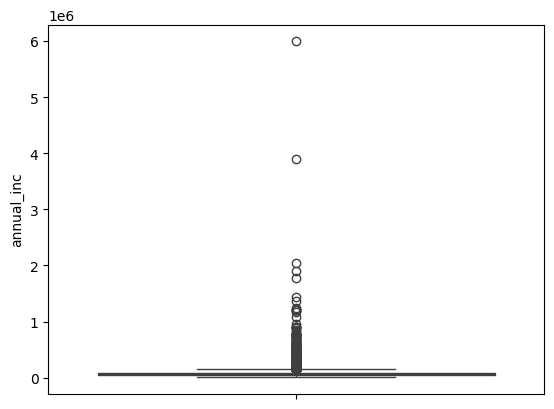

In [166]:
sns.boxplot(loan_df['annual_inc'])

#### The above representation clearly indicating the presence of outliers in annual_inc
#### The value after 0.95 quantile seems to be disconnected with the distribution
#### Hence ,We will restrict our data set to 0.95 quantile to avoid the irrelevant outlier data  

In [170]:
print(loan_df.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99]))

0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64


In [172]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

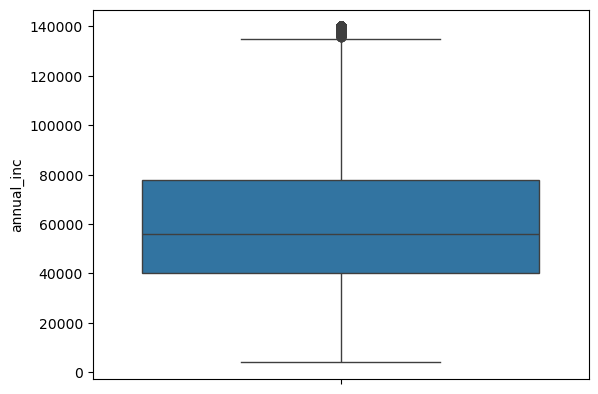

In [174]:
sns.boxplot(loan_df.annual_inc)

### 11.2) Handling Outlier for dti

<Axes: ylabel='dti'>

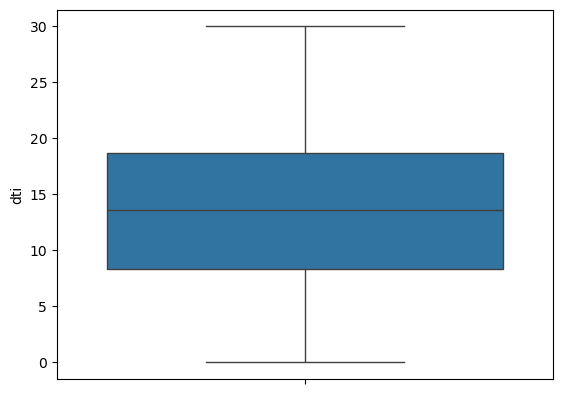

In [176]:
sns.boxplot(loan_df.dti)

#### There are no outliers identified with dti, hence keeping the dti variable data as it is.

### 11.3) Handling Outlier for loan_amt

<Axes: ylabel='loan_amnt'>

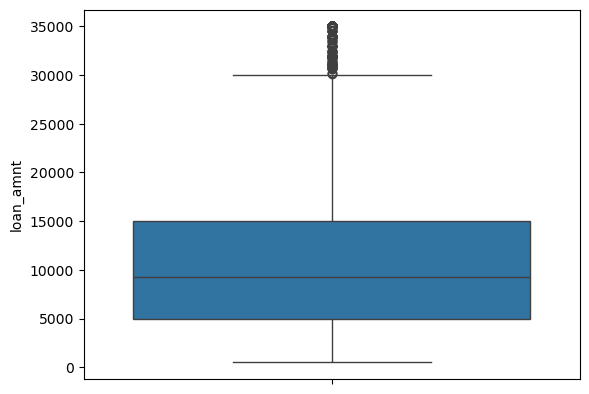

In [178]:
sns.boxplot(loan_df.loan_amnt)

#### From the above representation, it is evident that there are outliers for loan_amnt

#### From the quantile information ,we can observe the values are continuous until 0.98 and there is sudden spike,

#### Hence considering the value only inside the quantile 0.98

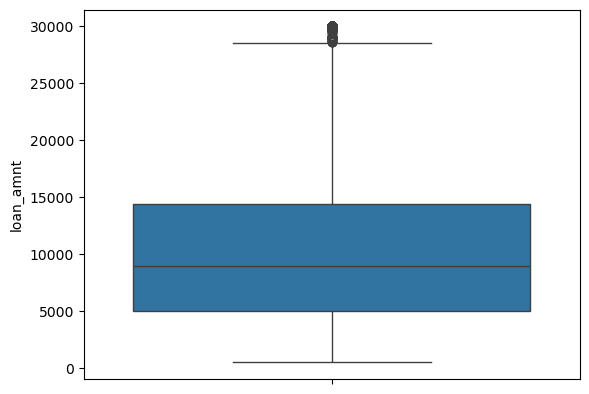

In [180]:
loan_amnt_Q98 = loan_df['loan_amnt'].quantile(0.98)
loan_df = loan_df[loan_df.loan_amnt <= loan_amnt_Q98]

sns.boxplot(loan_df['loan_amnt'])
plt.show()

### 11.4) Handling Outlier for funded_amnt_inv

<Axes: ylabel='funded_amnt_inv'>

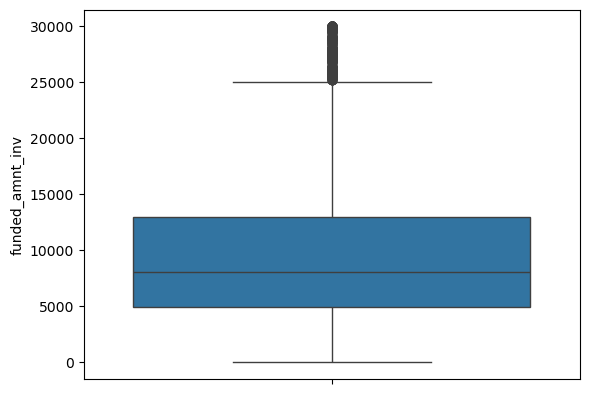

In [182]:
sns.boxplot(loan_df.funded_amnt_inv)

#### Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values for these above columns.

# Data Analysis Part 1 - using loan_status and one more column

### Following fields will be checked as part of the analysis

#### Ordered categorical data
 *    1. Grade (grade)
 *   2. Sub grade (sub_grade)
 *   3. Term (36 / 60 months) (term)
 *   4. Employment length (emp_length)
 *   5. Issue year (issue_d_year)
 *   6. Issue month (issue_d_month)
 *   7. Loan purpose (purpose)
 *   8. Home Ownership (home_ownership)
 *  9. Verification Status (verification_status)

    
#### Quantitative variables
 *  1. Interest rate bucket (int_rate_bucket)
 *   2. Annual income bucket (annual_inc_bucket)
 *   3. Loan amount bucket (loan_amnt_bucket)
 *   4. Debt to Income Ratio (DTI) bucket (dti_bucket)
 *   5. Monthly Installment (installment)

### 1.1) Analysing the variable grade

<Axes: xlabel='grade', ylabel='count'>

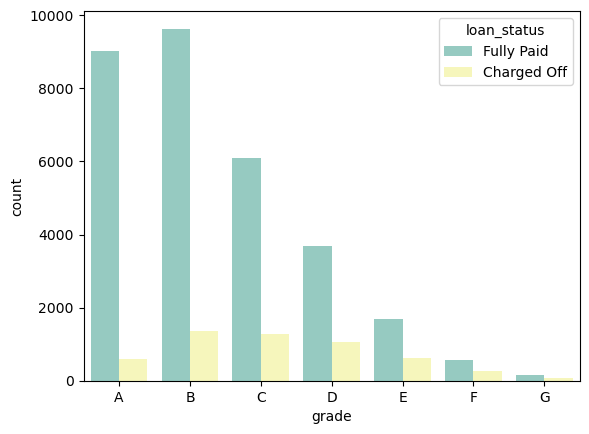

In [72]:
sns.countplot(x = 'grade', hue = 'loan_status', data = loan_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
              palette = 'Set3')

In [74]:
loan_grade_df = pd.DataFrame(loan_df.groupby(by=['grade','loan_status']).count().loan_amnt).reset_index()
loan_grade_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_grade_df_temp = pd.DataFrame(loan_df.groupby(by='grade').count().loan_amnt).reset_index()
loan_grade_df = pd.merge(loan_grade_df,loan_grade_df_temp, on='grade', how='inner')
loan_grade_df.rename(columns={'loan_amnt':'count_loan_grade'},inplace=True)
loan_grade_df['percentage'] = np.round(((loan_grade_df.count_loan_status/loan_grade_df.count_loan_grade)*100),2)
loan_grade_df

grade  loan_status  count_loan_status  count_loan_grade  percentage
0      A  Charged Off                593              9611        6.17
1      A   Fully Paid               9018              9611       93.83
2      B  Charged Off               1356             10988       12.34
3      B   Fully Paid               9632             10988       87.66
4      C  Charged Off               1292              7374       17.52
5      C   Fully Paid               6082              7374       82.48
6      D  Charged Off               1051              4737       22.19
7      D   Fully Paid               3686              4737       77.81
8      E  Charged Off                615              2304       26.69
9      E   Fully Paid               1689              2304       73.31
10     F  Charged Off                258               818       31.54
11     F   Fully Paid                560               818       68.46
12     G  Charged Off                 83               235       35.32
13     G   Fully Paid                152               235       64.68

<Axes: xlabel='grade', ylabel='percentage'>

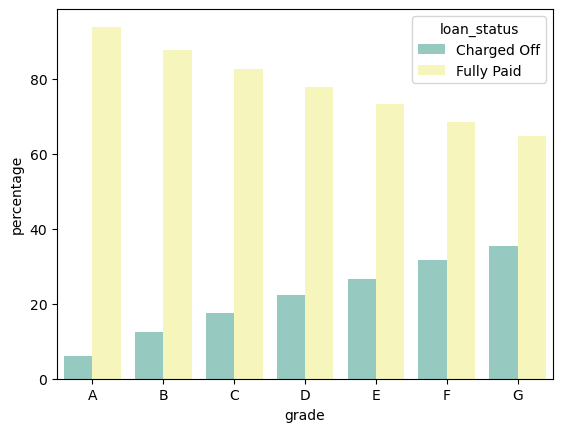

In [76]:
sns.barplot(x = 'grade' , y = 'percentage' ,hue = 'loan_status', data = loan_grade_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
              palette = 'Set3')

#### As can be seen above the highest percentage of defaulters(Charged Off) are in grade G (next highest in F and then in E).

### 1.2) Analysing the variable sub_grade

In [78]:
loan_df['sub_grade'].value_counts()

sub_grade
A4    2731
B3    2614
A5    2583
B5    2465
B4    2309
C1    1933
B2    1892
C2    1810
A3    1749
B1    1708
A2    1450
C3    1407
D2    1208
C4    1150
A1    1098
C5    1074
D3    1039
D1     879
D4     848
D5     763
E1     644
E2     539
E3     442
E4     369
E5     310
F1     252
F2     204
F3     147
F4     128
F5      87
G1      76
G2      60
G4      42
G3      36
G5      21
Name: count, dtype: int64

In [80]:
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
4    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

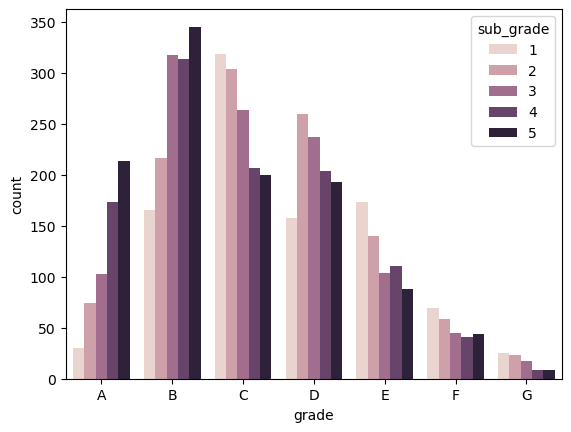

In [82]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 
              'Charged Off'])

In [84]:
loan_sub_grade_df = pd.DataFrame(loan_df.groupby(by=['sub_grade','loan_status']).count().loan_amnt).reset_index()
loan_sub_grade_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_sub_grade_df_temp = pd.DataFrame(loan_df.groupby(by='sub_grade').count().loan_amnt).reset_index()
loan_sub_grade_df = pd.merge(loan_sub_grade_df,loan_sub_grade_df_temp, on='sub_grade', how='inner')
loan_sub_grade_df.rename(columns={'loan_amnt':'count_loan_sub_grade'},inplace=True)
loan_sub_grade_df['percentage'] = np.round(((loan_sub_grade_df.count_loan_status/loan_sub_grade_df.count_loan_sub_grade)*100),2)
loan_sub_grade_df

sub_grade  loan_status  count_loan_status  count_loan_sub_grade  percentage
0          1  Charged Off                938                  6590       14.23
1          1   Fully Paid               5652                  6590       85.77
2          2  Charged Off               1075                  7163       15.01
3          2   Fully Paid               6088                  7163       84.99
4          3  Charged Off               1086                  7434       14.61
5          3   Fully Paid               6348                  7434       85.39
6          4  Charged Off               1057                  7577       13.95
7          4   Fully Paid               6520                  7577       86.05
8          5  Charged Off               1092                  7303       14.95
9          5   Fully Paid               6211                  7303       85.05

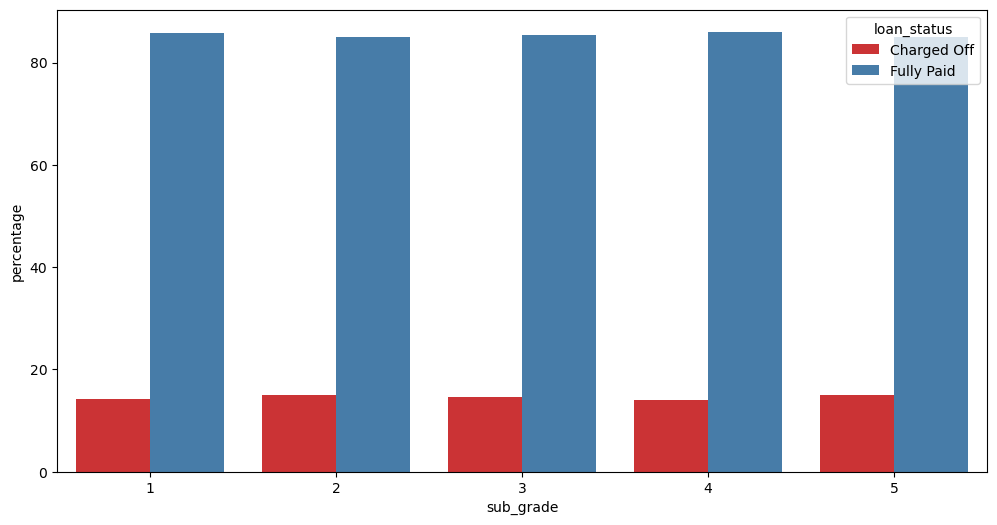

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'sub_grade' , y = 'percentage' ,hue = 'loan_status', data = loan_sub_grade_df, order = ['1', '2', '3', '4', '5'], 
              palette = 'Set1')
plt.show()

#### No impact. All sub grades show equal percentages of Charged Off and Fully Paid loans.

### 1.3) Analysing the variable term 

<Axes: xlabel='term', ylabel='count'>

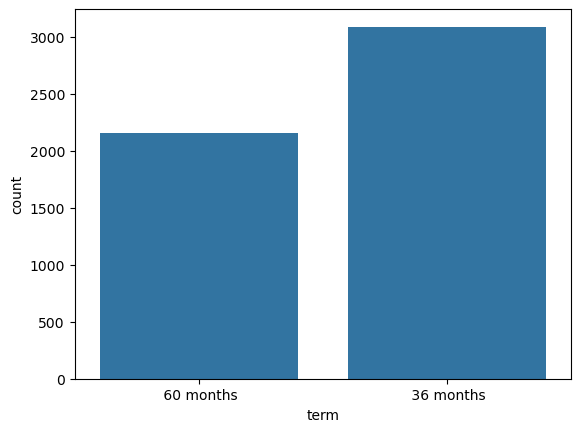

In [88]:
sns.countplot(x='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [92]:
loan_term_df = pd.DataFrame(loan_df.groupby(by=['term','loan_status']).count().loan_amnt).reset_index()
loan_term_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_term_df_temp = pd.DataFrame(loan_df.groupby(by='term').count().loan_amnt).reset_index()
loan_term_df = pd.merge(loan_term_df,loan_term_df_temp, on='term', how='inner')
loan_term_df.rename(columns={'loan_amnt':'count_loan_term'},inplace=True)
loan_term_df['percentage'] = np.round(((loan_term_df.count_loan_status/loan_term_df.count_loan_term)*100),2)
loan_term_df

term  loan_status  count_loan_status  count_loan_term  percentage
0   36 months  Charged Off               3088            27555       11.21
1   36 months   Fully Paid              24467            27555       88.79
2   60 months  Charged Off               2160             8512       25.38
3   60 months   Fully Paid               6352             8512       74.62

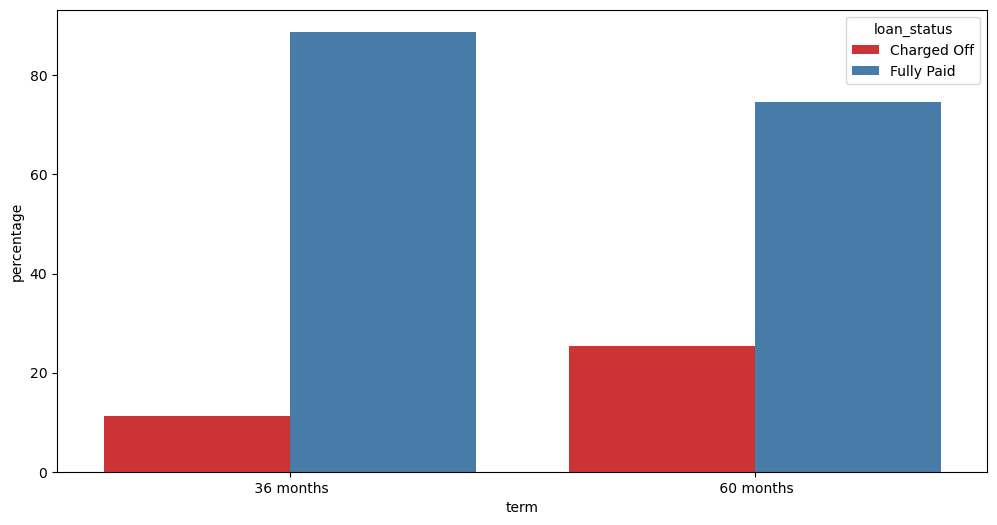

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'term' , y = 'percentage' ,hue = 'loan_status', data = loan_term_df,  
              palette = 'Set1')
plt.show()

#### 60 Months term shows higher percentage of Charged Off Loans.

### 1.4) Analysing the variable emp_length 

<Axes: xlabel='emp_length', ylabel='count'>

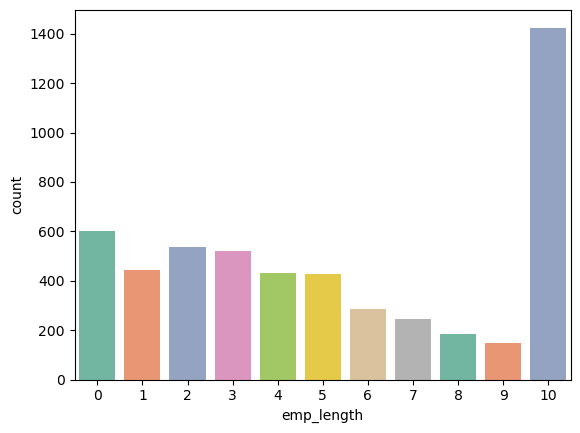

In [93]:
sns.countplot(x='emp_length', data=loan_df[loan_df['loan_status']=='Charged Off'], palette = 'Set2')

In [94]:
loan_emp_length_df = pd.DataFrame(loan_df.groupby(by=['emp_length','loan_status']).count().loan_amnt).reset_index()
loan_emp_length_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_emp_length_df_temp = pd.DataFrame(loan_df.groupby(by='emp_length').count().loan_amnt).reset_index()
loan_emp_length_df = pd.merge(loan_emp_length_df,loan_emp_length_df_temp, on='emp_length', how='inner')
loan_emp_length_df.rename(columns={'loan_amnt':'count_loan_emp_length'},inplace=True)
loan_emp_length_df['percentage'] = np.round(((loan_emp_length_df.count_loan_status/loan_emp_length_df.count_loan_emp_length)*100),2)
loan_emp_length_df

emp_length  loan_status  count_loan_status  count_loan_emp_length  \
0            0  Charged Off                600                   4274   
1            0   Fully Paid               3674                   4274   
2            1  Charged Off                444                   3019   
3            1   Fully Paid               2575                   3019   
4            2  Charged Off                536                   4063   
5            2   Fully Paid               3527                   4063   
6            3  Charged Off                520                   3776   
7            3   Fully Paid               3256                   3776   
8            4  Charged Off                430                   3156   
9            4   Fully Paid               2726                   3156   
10           5  Charged Off                429                   2998   
11           5   Fully Paid               2569                   2998   
12           6  Charged Off                285                   2045   
13           6   Fully Paid               1760                   2045   
14           7  Charged Off                244                   1616   
15           7   Fully Paid               1372                   1616   
16           8  Charged Off                186                   1315   
17           8   Fully Paid               1129                   1315   
18           9  Charged Off                149                   1141   
19           9   Fully Paid                992                   1141   
20          10  Charged Off               1425                   8664   
21          10   Fully Paid               7239                   8664   

    percentage  
0        14.04  
1        85.96  
2        14.71  
3        85.29  
4        13.19  
5        86.81  
6        13.77  
7        86.23  
8        13.62  
9        86.38  
10       14.31  
11       85.69  
12       13.94  
13       86.06  
14       15.10  
15       84.90  
16       14.14  
17       85.86  
18       13.06  
19       86.94  
20       16.45  
21       83.55

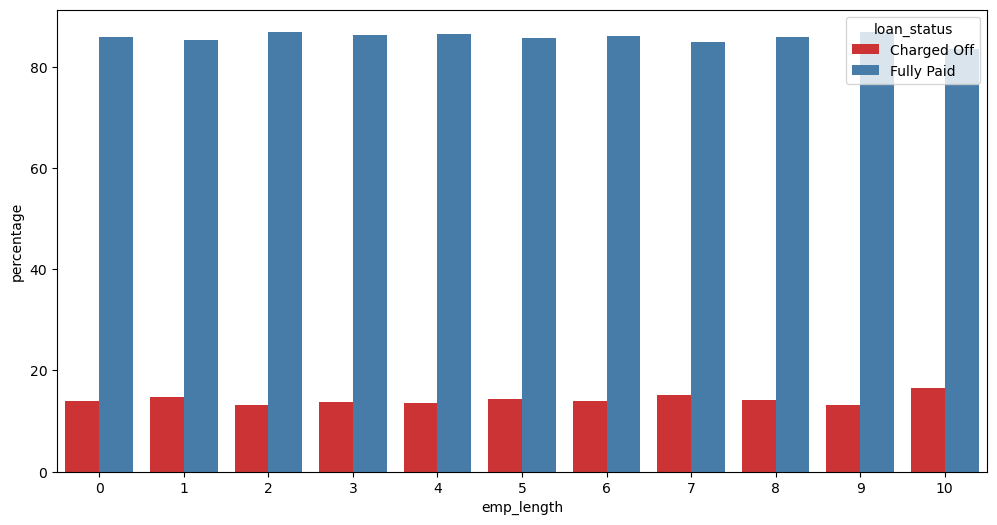

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'emp_length' , y = 'percentage' ,hue = 'loan_status', data = loan_emp_length_df,  
              palette = 'Set1')
plt.show()

#### No Impact. All emp_length values have almost equal percentage of defaulters though emp_length >=10 years have little higher percentage of defaulters.

### 1.5) Analysing the variable issued_d_year (derived variable from issue_d)

<Axes: xlabel='issue_d_year', ylabel='count'>

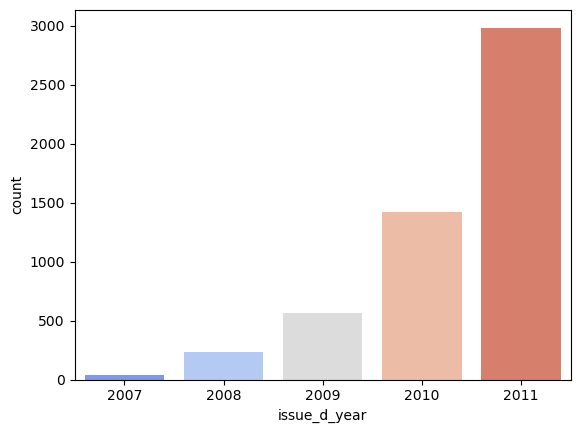

In [98]:
sns.countplot(x='issue_d_year', data=loan_df[loan_df['loan_status']=='Charged Off'], palette = 'coolwarm')

### 1.6) Analysing the variable issued_d_month (derived variable from issue_d)

<Axes: xlabel='issue_d_month', ylabel='count'>

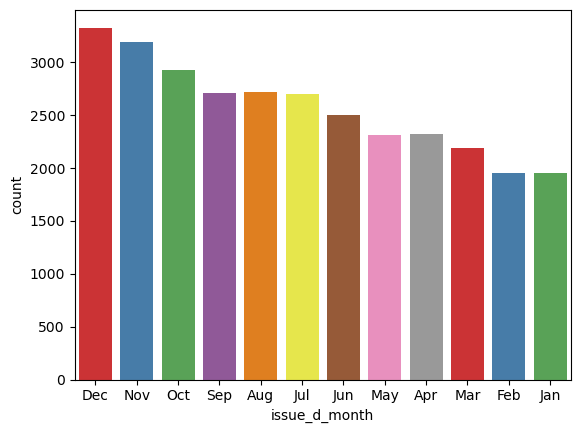

In [100]:
sns.countplot(x='issue_d_month', data=loan_df[loan_df['loan_status']=='Fully Paid'], palette = 'Set1')

In [292]:
loan_issue_d_month_df = pd.DataFrame(loan_df.groupby(by=['issue_d_month','loan_status']).count().loan_amnt).reset_index()
loan_issue_d_month_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_issue_d_month_df_temp = pd.DataFrame(loan_df.groupby(by='issue_d_month').count().loan_amnt).reset_index()
loan_issue_d_month_df = pd.merge(loan_issue_d_month_df,loan_issue_d_month_df_temp, on='issue_d_month', how='inner')
loan_issue_d_month_df.rename(columns={'loan_amnt':'count_loan_issue_d_month'},inplace=True)
loan_issue_d_month_df['percentage'] = np.round(((loan_issue_d_month_df.count_loan_status/loan_issue_d_month_df.count_loan_issue_d_month)*100),2)
loan_issue_d_month_df

issue_d_month  loan_status  count_loan_status  count_loan_issue_d_month  \
0            Apr  Charged Off                344                      2668   
1            Apr   Fully Paid               2324                      2668   
2            Aug  Charged Off                437                      3160   
3            Aug   Fully Paid               2723                      3160   
4            Dec  Charged Off                637                      3965   
5            Dec   Fully Paid               3328                      3965   
6            Feb  Charged Off                277                      2226   
7            Feb   Fully Paid               1949                      2226   
8            Jan  Charged Off                311                      2263   
9            Jan   Fully Paid               1952                      2263   
10           Jul  Charged Off                445                      3143   
11           Jul   Fully Paid               2698                      3143   
12           Jun  Charged Off                444                      2947   
13           Jun   Fully Paid               2503                      2947   
14           Mar  Charged Off                318                      2512   
15           Mar   Fully Paid               2194                      2512   
16           May  Charged Off                445                      2762   
17           May   Fully Paid               2317                      2762   
18           Nov  Charged Off                552                      3745   
19           Nov   Fully Paid               3193                      3745   
20           Oct  Charged Off                525                      3450   
21           Oct   Fully Paid               2925                      3450   
22           Sep  Charged Off                513                      3226   
23           Sep   Fully Paid               2713                      3226   

    percentage  
0        12.89  
1        87.11  
2        13.83  
3        86.17  
4        16.07  
5        83.93  
6        12.44  
7        87.56  
8        13.74  
9        86.26  
10       14.16  
11       85.84  
12       15.07  
13       84.93  
14       12.66  
15       87.34  
16       16.11  
17       83.89  
18       14.74  
19       85.26  
20       15.22  
21       84.78  
22       15.90  
23       84.10

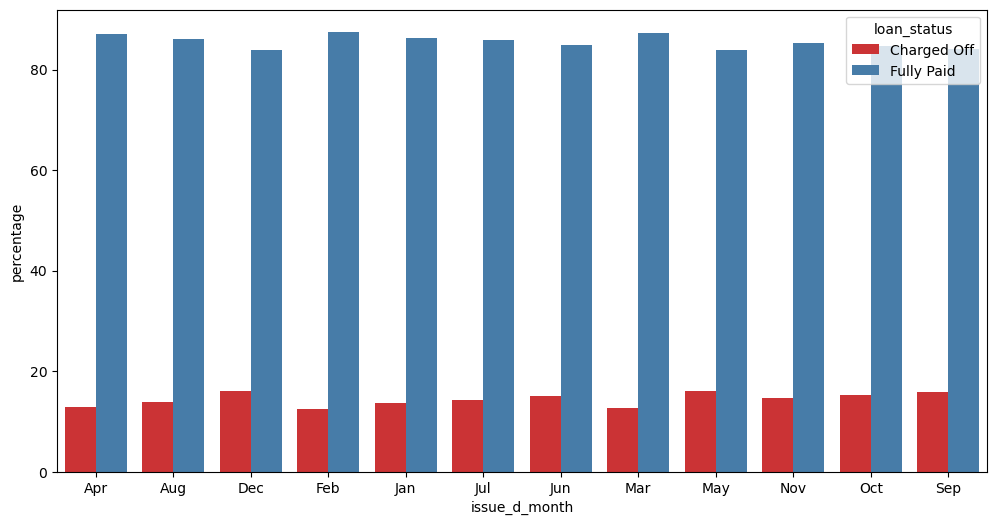

In [294]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'issue_d_month' , y = 'percentage' ,hue = 'loan_status', data = loan_issue_d_month_df,  
              palette = 'Set1')
plt.show()

#### No Impact

### 1.7) Analysing the variable purpose 

<Axes: xlabel='count', ylabel='purpose'>

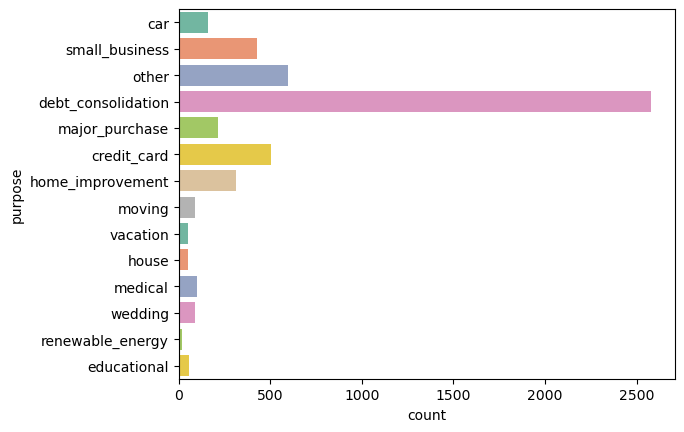

In [102]:
sns.countplot(y='purpose', data=loan_df[loan_df['loan_status']=='Charged Off'], palette = 'Set2')

In [298]:
loan_purpose_df = pd.DataFrame(loan_df.groupby(by=['purpose','loan_status']).count().loan_amnt).reset_index()
loan_purpose_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_purpose_df_temp = pd.DataFrame(loan_df.groupby(by='purpose').count().loan_amnt).reset_index()
loan_purpose_df = pd.merge(loan_purpose_df,loan_purpose_df_temp, on='purpose', how='inner')
loan_purpose_df.rename(columns={'loan_amnt':'count_loan_purpose'},inplace=True)
loan_purpose_df['percentage'] = np.round(((loan_purpose_df.count_loan_status/loan_purpose_df.count_loan_purpose)*100),2)
loan_purpose_df

purpose  loan_status  count_loan_status  count_loan_purpose  \
0                  car  Charged Off                158                1446   
1                  car   Fully Paid               1288                1446   
2          credit_card  Charged Off                506                4726   
3          credit_card   Fully Paid               4220                4726   
4   debt_consolidation  Charged Off               2580               16968   
5   debt_consolidation   Fully Paid              14388               16968   
6          educational  Charged Off                 54                 309   
7          educational   Fully Paid                255                 309   
8     home_improvement  Charged Off                311                2505   
9     home_improvement   Fully Paid               2194                2505   
10               house  Charged Off                 53                 331   
11               house   Fully Paid                278                 331   
12      major_purchase  Charged Off                215                2032   
13      major_purchase   Fully Paid               1817                2032   
14             medical  Charged Off                101                 636   
15             medical   Fully Paid                535                 636   
16              moving  Charged Off                 90                 547   
17              moving   Fully Paid                457                 547   
18               other  Charged Off                595                3660   
19               other   Fully Paid               3065                3660   
20    renewable_energy  Charged Off                 18                  94   
21    renewable_energy   Fully Paid                 76                  94   
22      small_business  Charged Off                425                1562   
23      small_business   Fully Paid               1137                1562   
24            vacation  Charged Off                 52                 364   
25            vacation   Fully Paid                312                 364   
26             wedding  Charged Off                 90                 887   
27             wedding   Fully Paid                797                 887   

    percentage  
0        10.93  
1        89.07  
2        10.71  
3        89.29  
4        15.21  
5        84.79  
6        17.48  
7        82.52  
8        12.42  
9        87.58  
10       16.01  
11       83.99  
12       10.58  
13       89.42  
14       15.88  
15       84.12  
16       16.45  
17       83.55  
18       16.26  
19       83.74  
20       19.15  
21       80.85  
22       27.21  
23       72.79  
24       14.29  
25       85.71  
26       10.15  
27       89.85

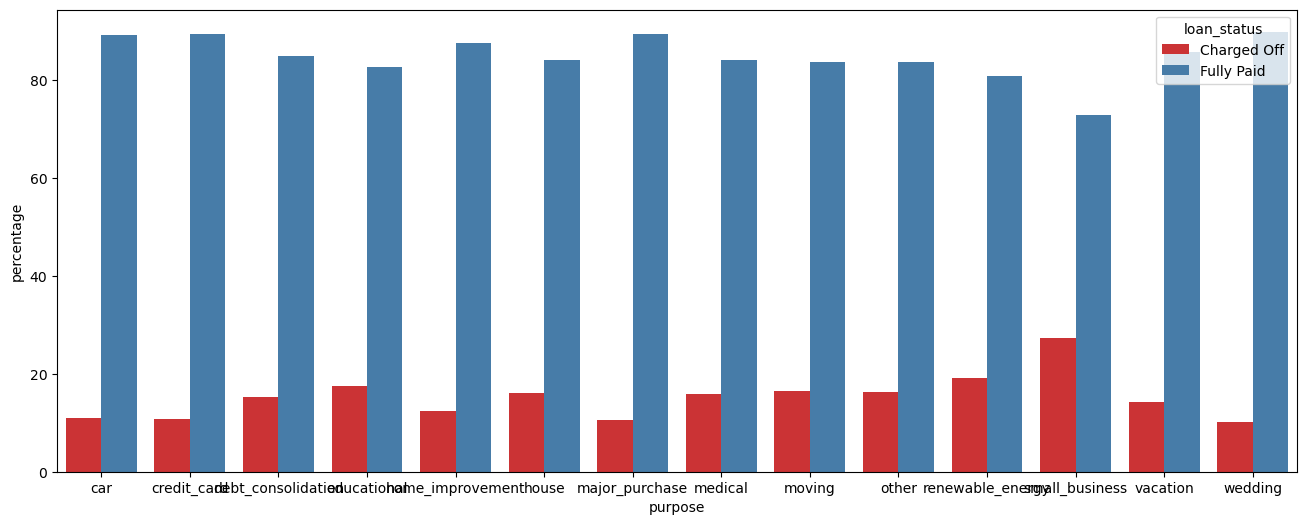

In [302]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'purpose' , y = 'percentage' ,hue = 'loan_status', data = loan_purpose_df,  
              palette = 'Set1')
plt.show()

#### Highest percentage of defaulters(Charged Off) are there for loans taken for  'small_business'.

### 1.8) Analysing the variable home_ownership 

<Axes: xlabel='home_ownership', ylabel='count'>

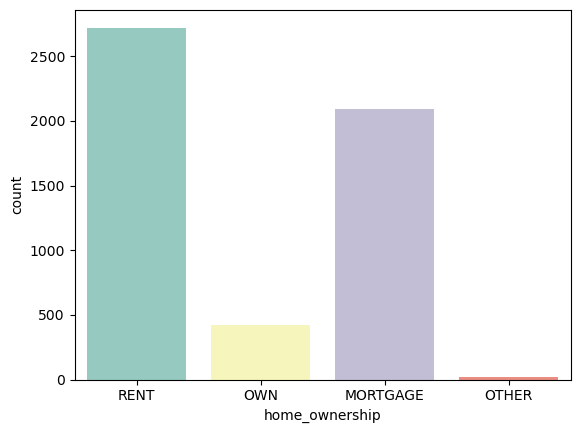

In [104]:
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'], palette = 'Set3')

In [307]:
loan_home_ownership_df = pd.DataFrame(loan_df.groupby(by=['home_ownership','loan_status']).count().loan_amnt).reset_index()
loan_home_ownership_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_home_ownership_df_temp = pd.DataFrame(loan_df.groupby(by='home_ownership').count().loan_amnt).reset_index()
loan_home_ownership_df = pd.merge(loan_home_ownership_df,loan_home_ownership_df_temp, on='home_ownership', how='inner')
loan_home_ownership_df.rename(columns={'loan_amnt':'count_loan_home_ownership'},inplace=True)
loan_home_ownership_df['percentage'] = np.round(((loan_home_ownership_df.count_loan_status/loan_home_ownership_df.count_loan_home_ownership)*100),2)
loan_home_ownership_df

home_ownership  loan_status  count_loan_status  count_loan_home_ownership  \
0       MORTGAGE  Charged Off               2088                      15301   
1       MORTGAGE   Fully Paid              13213                      15301   
2          OTHER  Charged Off                 17                         94   
3          OTHER   Fully Paid                 77                         94   
4            OWN  Charged Off                422                       2814   
5            OWN   Fully Paid               2392                       2814   
6           RENT  Charged Off               2721                      17858   
7           RENT   Fully Paid              15137                      17858   

   percentage  
0       13.65  
1       86.35  
2       18.09  
3       81.91  
4       15.00  
5       85.00  
6       15.24  
7       84.76

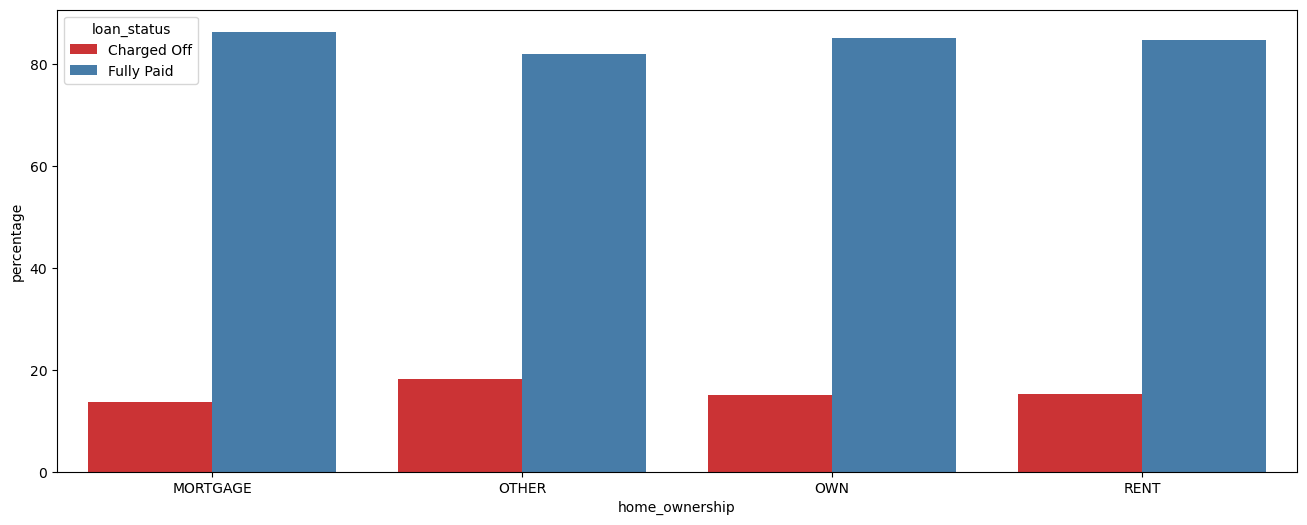

In [309]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'home_ownership' , y = 'percentage' ,hue = 'loan_status', data = loan_home_ownership_df,  
              palette = 'Set1')
plt.show()

#### Home_Ownership has almost no significant impact. Though Home_ownership = OTHER has slightly higher percentage
#### of defaulters(Charged Off loans) as compared to other values of home_ownership. 

### 1.9) Analysing the variable verification_status 

<Axes: xlabel='verification_status', ylabel='count'>

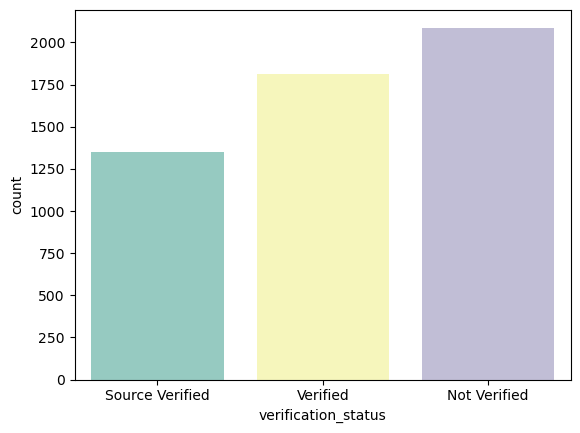

In [106]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'],palette = 'Set3')

In [318]:
loan_verification_status_df = pd.DataFrame(loan_df.groupby(by=['verification_status','loan_status']).count().loan_amnt).reset_index()
loan_verification_status_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_verification_status_df_temp = pd.DataFrame(loan_df.groupby(by='verification_status').count().loan_amnt).reset_index()
loan_verification_status_df = pd.merge(loan_verification_status_df,loan_verification_status_df_temp, on='verification_status', how='inner')
loan_verification_status_df.rename(columns={'loan_amnt':'count_loan_verification_status'},inplace=True)
loan_verification_status_df['percentage'] = 
np.round(((loan_verification_status_df.count_loan_status/loan_verification_status_df.count_loan_verification_status)*100),2)
loan_verification_status_df

verification_status  loan_status  count_loan_status  \
0        Not Verified  Charged Off               2088   
1        Not Verified   Fully Paid              14161   
2     Source Verified  Charged Off               1350   
3     Source Verified   Fully Paid               7726   
4            Verified  Charged Off               1810   
5            Verified   Fully Paid               8932   

   count_loan_verification_status  percentage  
0                           16249       12.85  
1                           16249       87.15  
2                            9076       14.87  
3                            9076       85.13  
4                           10742       16.85  
5                           10742       83.15

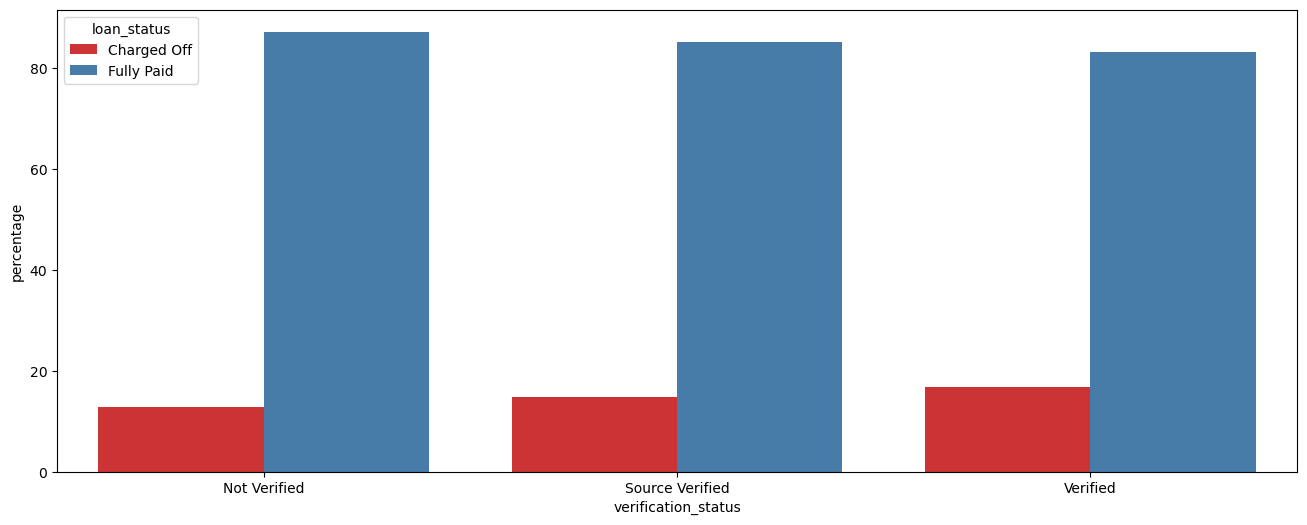

In [331]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'verification_status' , y = 'percentage' ,hue = 'loan_status', data = loan_verification_status_df,  
              palette = 'Set1')
plt.show()

#### No Impact. Almost negligible differences in percentages, though verification_status = 'verified' shows highest percentage of defaulted loans as compared to other values of verification_status.

#### Creating bins for better understanding of the distribution and visualize the numerical distribution as categorical
#### After understanding the data distribution bins are created for the following variables
#### installment,loan_amnt,dti,annual_inc,int_rate

In [193]:
loan_df['installment_category'] = pd.cut(loan_df['installment'], bins=6,precision =0,labels=['0-185','185-370','370-555','555-740','740-925','925-1110'])
loan_df['loan_amnt_category'] = pd.cut(loan_df['loan_amnt'], bins=5,precision =0,labels=['0-6k','6k-12k','12k-18k','18k-24k','24k-30k'])
loan_df['dti_category'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_df['int_rate_category'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['annual_inc_category'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['0k-28k','28k-56k','56k-84k','84k-112k','112k-140k'])

### 1.10) Analysing the variable loan_amnt 

Text(0.5, 1.0, 'Charged Off')

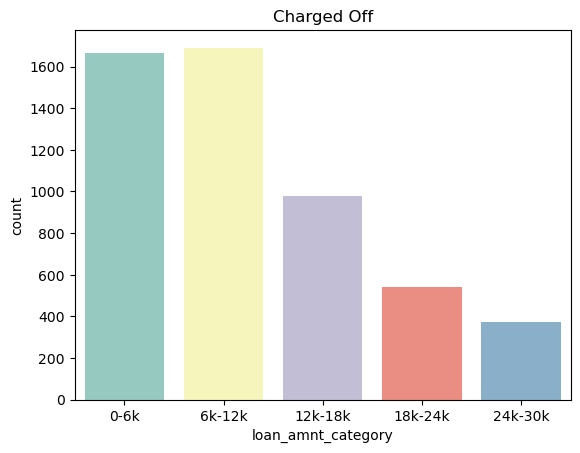

In [195]:
sns.countplot(x='loan_amnt_category', data=loan_df[loan_df['loan_status']=='Charged Off'], palette = 'Set3')
plt.title('Charged Off')

Text(0.5, 1.0, 'Fully Paid')

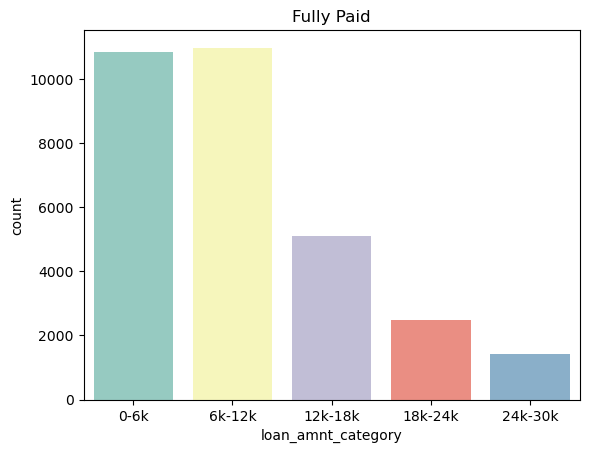

In [197]:
sns.countplot(x='loan_amnt_category', data=loan_df[loan_df['loan_status']=='Fully Paid'], palette = 'Set3')
plt.title('Fully Paid')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

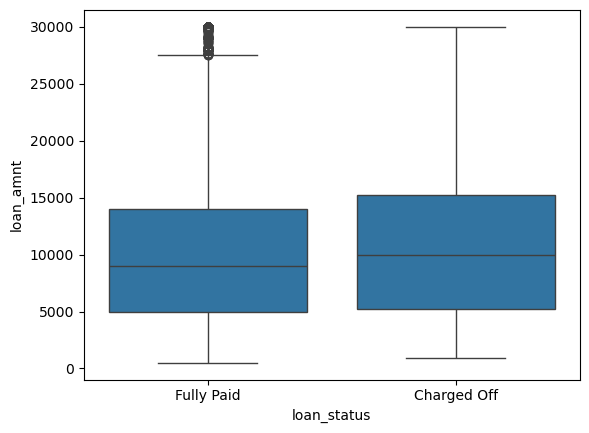

In [201]:
sns.boxplot(y= 'loan_amnt', x = 'loan_status', data = loan_df)

In [199]:
loan_amnt_category_df = pd.DataFrame(loan_df.groupby(by=['loan_amnt_category','loan_status']).count().loan_amnt).reset_index()
loan_amnt_category_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_amnt_category_df_temp = pd.DataFrame(loan_df.groupby(by='loan_amnt_category').count().loan_amnt).reset_index()
loan_amnt_category_df = pd.merge(loan_amnt_category_df,loan_amnt_category_df_temp, on='loan_amnt_category', how='inner')
loan_amnt_category_df.rename(columns={'loan_amnt':'count_loan_amnt_category'},inplace=True)
loan_amnt_category_df['percentage'] = np.round(((loan_amnt_category_df.count_loan_status/loan_amnt_category_df.count_loan_amnt_category)*100),2)
loan_amnt_category_df

loan_amnt_category  loan_status  count_loan_status  \
0               0-6k  Charged Off               1666   
1               0-6k   Fully Paid              10828   
2             6k-12k  Charged Off               1691   
3             6k-12k   Fully Paid              10979   
4            12k-18k  Charged Off                977   
5            12k-18k   Fully Paid               5116   
6            18k-24k  Charged Off                541   
7            18k-24k   Fully Paid               2475   
8            24k-30k  Charged Off                373   
9            24k-30k   Fully Paid               1421   

   count_loan_amnt_category  percentage  
0                     12494       13.33  
1                     12494       86.67  
2                     12670       13.35  
3                     12670       86.65  
4                      6093       16.03  
5                      6093       83.97  
6                      3016       17.94  
7                      3016       82.06  
8                      1794       20.79  
9                      1794       79.21

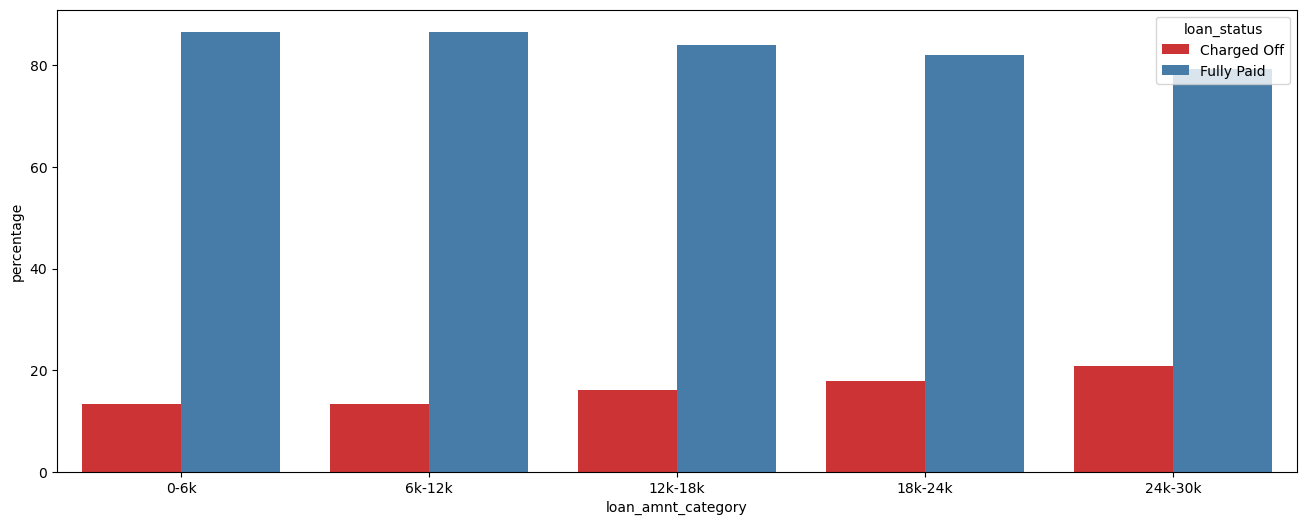

In [104]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'loan_amnt_category' , y = 'percentage' ,hue = 'loan_status', data = loan_amnt_category_df,  
              palette = 'Set1')
plt.show()

#### It seems that as the loan amount increases the possibility of default(Charged Off) increases. The loan_amnt_category with highest loan
#### seems to have highest percentage of loan default(Charged Off).

### 1.11) Analysing the variable int_rate 

<Axes: xlabel='loan_status', ylabel='int_rate'>

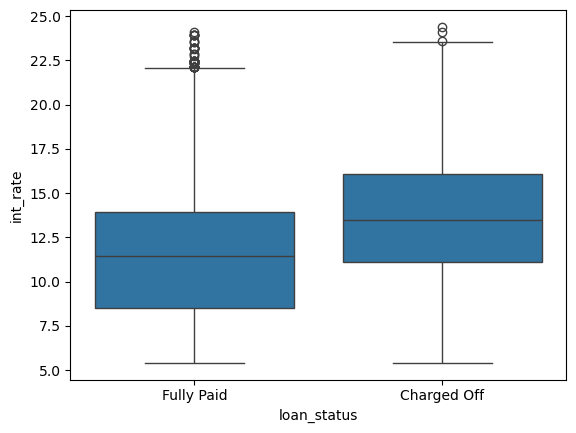

In [203]:
sns.boxplot(y= 'int_rate', x = 'loan_status', data = loan_df)

In [345]:
loan_int_rate_category_df = pd.DataFrame(loan_df.groupby(by=['int_rate_category','loan_status']).count().loan_amnt).reset_index()
loan_int_rate_category_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_int_rate_category_df_temp = pd.DataFrame(loan_df.groupby(by='int_rate_category').count().loan_amnt).reset_index()
loan_int_rate_category_df = pd.merge(loan_int_rate_category_df,loan_int_rate_category_df_temp, on='int_rate_category', how='inner')
loan_int_rate_category_df.rename(columns={'loan_amnt':'count_int_rate_category'},inplace=True)
loan_int_rate_category_df['percentage'] = np.round(((loan_int_rate_category_df.count_loan_status/loan_int_rate_category_df.count_int_rate_category)*100),2)
loan_int_rate_category_df

int_rate_category  loan_status  count_loan_status  count_int_rate_category  \
0             5%-9%  Charged Off                578                     9412   
1             5%-9%   Fully Paid               8834                     9412   
2            9%-13%  Charged Off               1747                    13339   
3            9%-13%   Fully Paid              11592                    13339   
4           13%-17%  Charged Off               1908                    10025   
5           13%-17%   Fully Paid               8117                    10025   
6           17%-21%  Charged Off                851                     2895   
7           17%-21%   Fully Paid               2044                     2895   
8           21%-24%  Charged Off                164                      396   
9           21%-24%   Fully Paid                232                      396   

   percentage  
0        6.14  
1       93.86  
2       13.10  
3       86.90  
4       19.03  
5       80.97  
6       29.40  
7       70.60  
8       41.41  
9       58.59

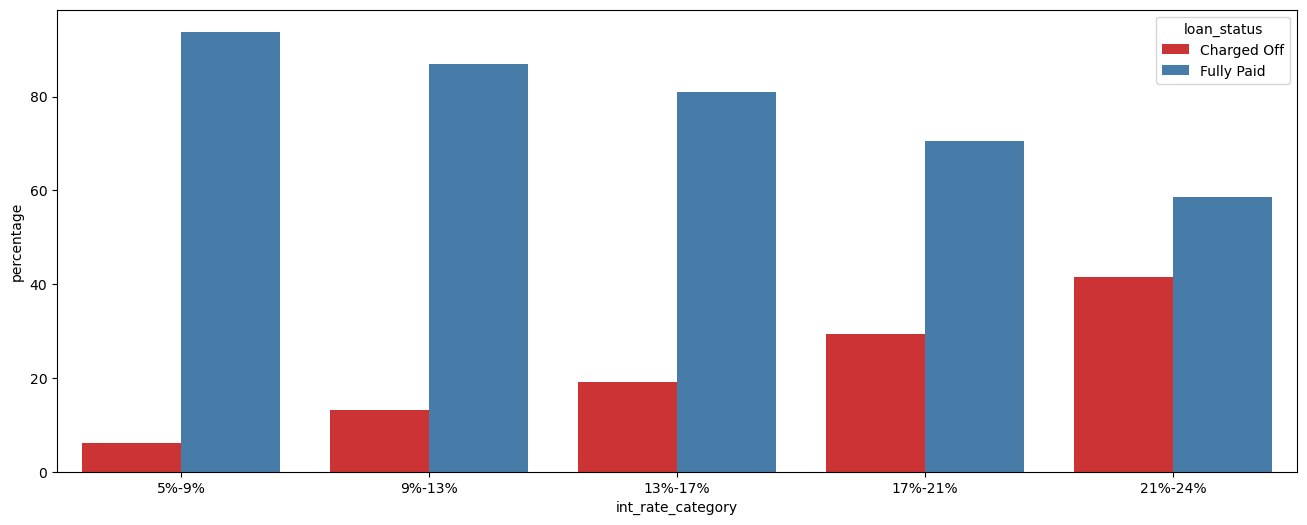

In [347]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'int_rate_category' , y = 'percentage' ,hue = 'loan_status', data = loan_int_rate_category_df,  
              palette = 'Set1')
plt.show()

#### Above graph shows that the highest percentage of loan defaults(Charged Off) are for loans where interest rate is high around 17%-24%

### 1.12) Analysing the variable installment 

<Axes: xlabel='loan_status', ylabel='installment'>

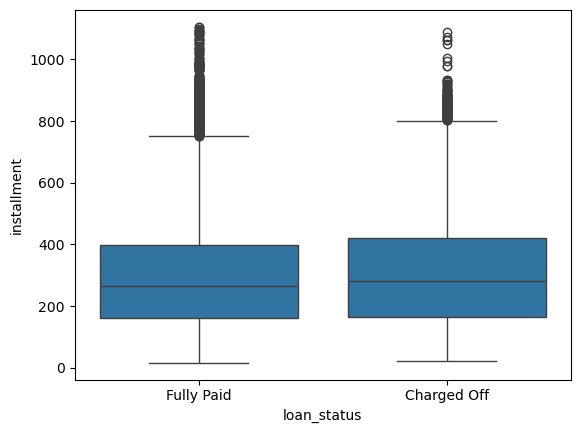

In [205]:
sns.boxplot(y= 'installment', x = 'loan_status', data = loan_df)

In [350]:
loan_installment_category_df = pd.DataFrame(loan_df.groupby(by=['installment_category','loan_status']).count().loan_amnt).reset_index()
loan_installment_category_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_installment_category_df_temp = pd.DataFrame(loan_df.groupby(by='installment_category').count().loan_amnt).reset_index()
loan_installment_category_df = pd.merge(loan_installment_category_df,loan_installment_category_df_temp, on='installment_category', how='inner')
loan_installment_category_df.rename(columns={'loan_amnt':'count_installment_category'},inplace=True)
loan_installment_category_df['percentage'] = np.round(((loan_installment_category_df.count_loan_status/loan_installment_category_df.count_installment_category)*100),2)
loan_installment_category_df

installment_category  loan_status  count_loan_status  \
0                 0-185  Charged Off               1733   
1                 0-185   Fully Paid              10768   
2               185-370  Charged Off               1884   
3               185-370   Fully Paid              11444   
4               370-555  Charged Off               1050   
5               370-555   Fully Paid               5511   
6               555-740  Charged Off                402   
7               555-740   Fully Paid               2131   
8               740-925  Charged Off                165   
9               740-925   Fully Paid                875   
10             925-1110  Charged Off                 14   
11             925-1110   Fully Paid                 90   

    count_installment_category  percentage  
0                        12501       13.86  
1                        12501       86.14  
2                        13328       14.14  
3                        13328       85.86  
4                         6561       16.00  
5                         6561       84.00  
6                         2533       15.87  
7                         2533       84.13  
8                         1040       15.87  
9                         1040       84.13  
10                         104       13.46  
11                         104       86.54

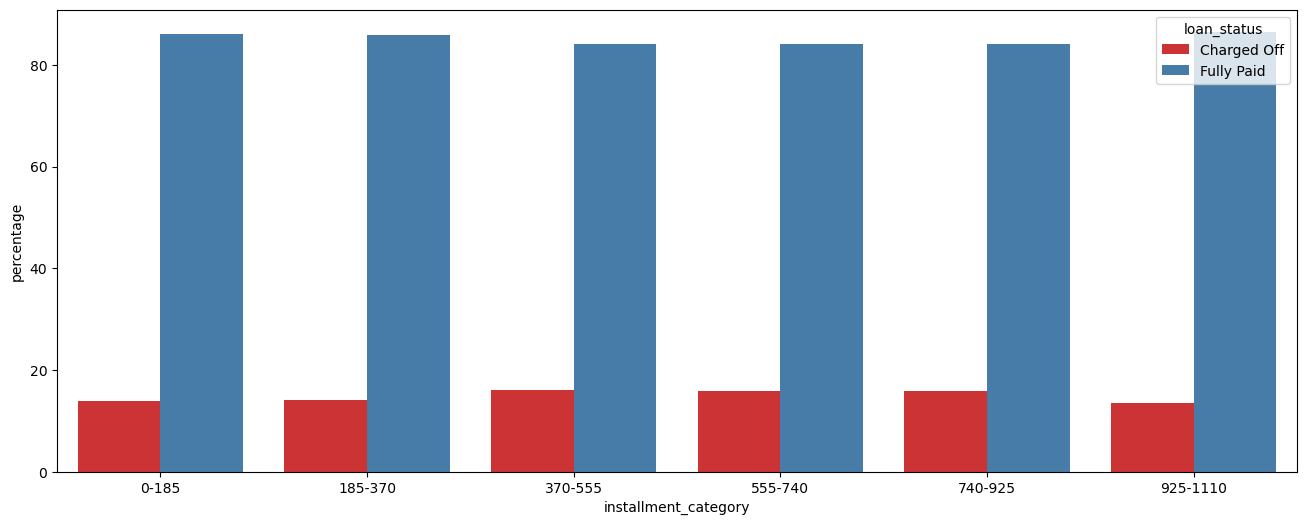

In [352]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'installment_category' , y = 'percentage' ,hue = 'loan_status', data = loan_installment_category_df,  
              palette = 'Set1')
plt.show()

#### No Impact. Negligibile differences

### 1.13) Analysing the variable dti 

<Axes: xlabel='loan_status', ylabel='dti'>

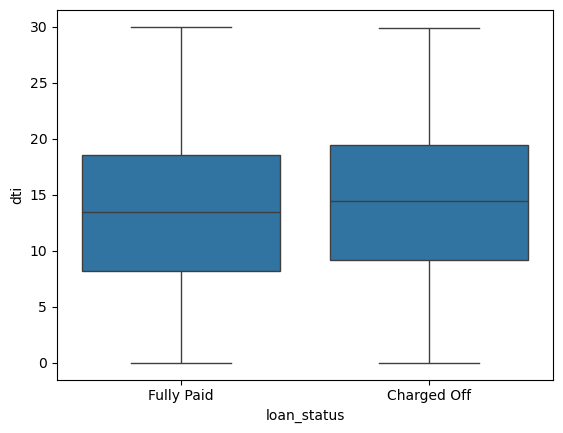

In [207]:
sns.boxplot(y= 'dti', x = 'loan_status', data = loan_df)

<Axes: xlabel='dti_category', ylabel='count'>

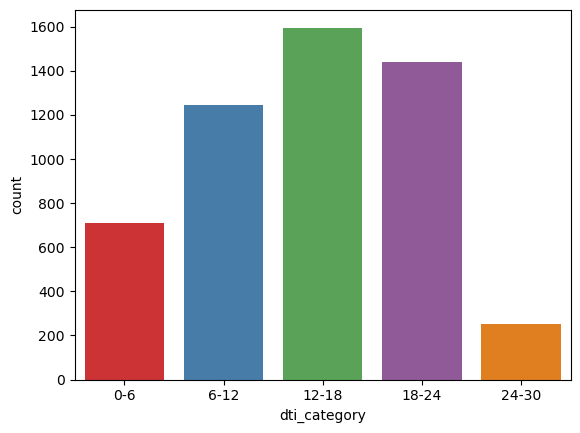

In [117]:
sns.countplot(x='dti_category', data=loan_df[loan_df['loan_status']=='Charged Off'],palette = 'Set1')

<Axes: xlabel='dti_category', ylabel='count'>

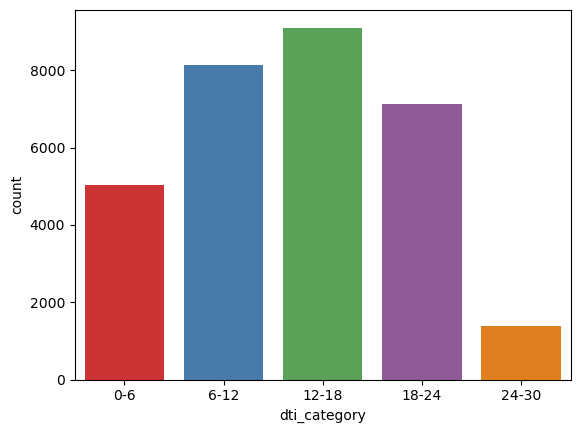

In [355]:
sns.countplot(x='dti_category', data=loan_df[loan_df['loan_status']=='Fully Paid'],palette = 'Set1')

In [357]:
loan_dti_category_df = pd.DataFrame(loan_df.groupby(by=['dti_category','loan_status']).count().loan_amnt).reset_index()
loan_dti_category_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_dti_category_df_temp = pd.DataFrame(loan_df.groupby(by='dti_category').count().loan_amnt).reset_index()
loan_dti_category_df = pd.merge(loan_dti_category_df,loan_dti_category_df_temp, on='dti_category', how='inner')
loan_dti_category_df.rename(columns={'loan_amnt':'count_dti_category'},inplace=True)
loan_dti_category_df['percentage'] = np.round(((loan_dti_category_df.count_loan_status/loan_dti_category_df.count_dti_category)*100),2)
loan_dti_category_df

dti_category  loan_status  count_loan_status  count_dti_category  percentage
0          0-6  Charged Off                711                5753       12.36
1          0-6   Fully Paid               5042                5753       87.64
2         6-12  Charged Off               1247                9393       13.28
3         6-12   Fully Paid               8146                9393       86.72
4        12-18  Charged Off               1596               10703       14.91
5        12-18   Fully Paid               9107               10703       85.09
6        18-24  Charged Off               1440                8575       16.79
7        18-24   Fully Paid               7135                8575       83.21
8        24-30  Charged Off                254                1643       15.46
9        24-30   Fully Paid               1389                1643       84.54

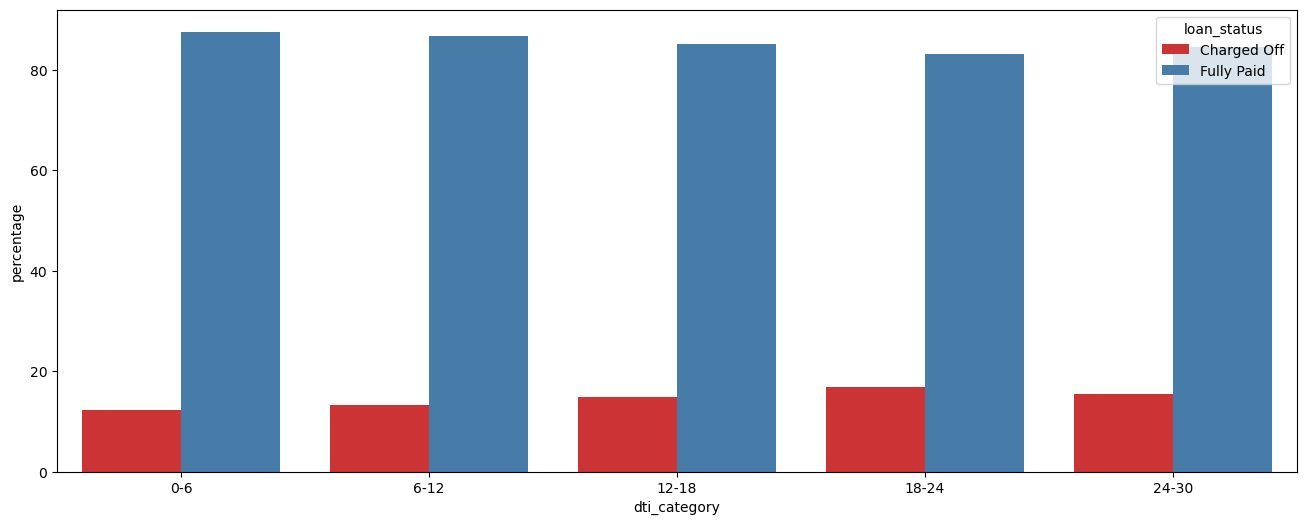

In [359]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'dti_category' , y = 'percentage' ,hue = 'loan_status', data = loan_dti_category_df,  
              palette = 'Set1')
plt.show()

#### Not very signifcant differences but higher percentage of defaults(charged off) can be seen for dti ranging between 18-30. It can be seen that in general when dti increases the risk of loan being Charged Off increases.

### 1.14) Analysing the variable annual Income 

<Axes: xlabel='loan_status', ylabel='annual_inc'>

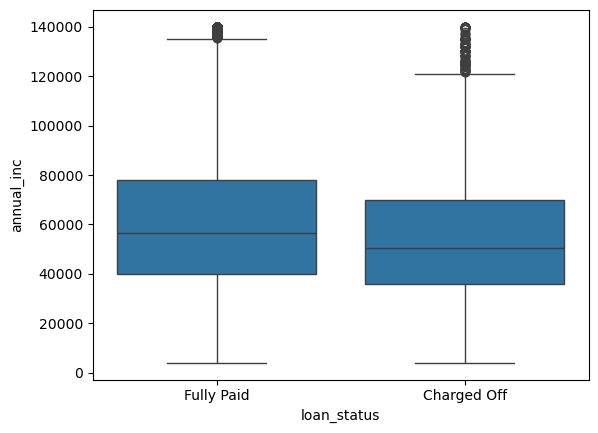

In [209]:
sns.boxplot(y= 'annual_inc', x = 'loan_status', data = loan_df)

<Axes: xlabel='annual_inc_category', ylabel='count'>

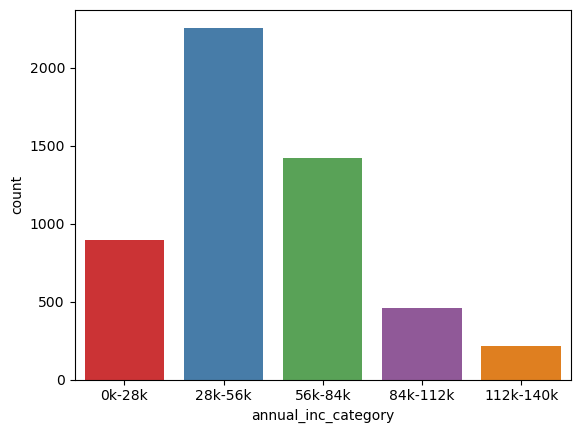

In [119]:
sns.countplot(x='annual_inc_category', data=loan_df[loan_df['loan_status']=='Charged Off'],palette = 'Set1')

<Axes: xlabel='annual_inc_category', ylabel='count'>

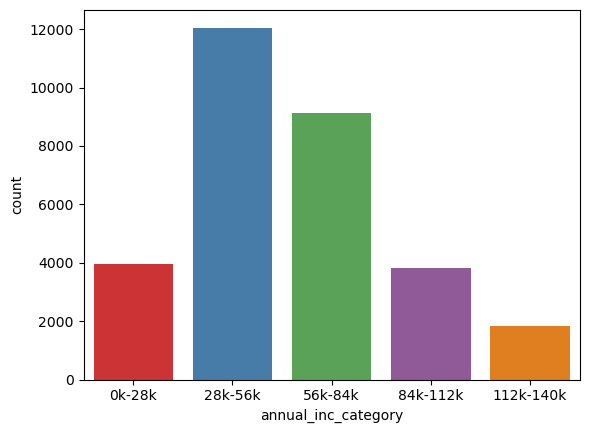

In [363]:
sns.countplot(x='annual_inc_category', data=loan_df[loan_df['loan_status']=='Fully Paid'],palette = 'Set1')

In [365]:
loan_annual_inc_category_df = pd.DataFrame(loan_df.groupby(by=['annual_inc_category','loan_status']).count().loan_amnt).reset_index()
loan_annual_inc_category_df.rename(columns={'loan_amnt':'count_loan_status'}, inplace=True)
loan_annual_inc_category_df_temp = pd.DataFrame(loan_df.groupby(by='annual_inc_category').count().loan_amnt).reset_index()
loan_annual_inc_category_df = pd.merge(loan_annual_inc_category_df,loan_annual_inc_category_df_temp, on='annual_inc_category', how='inner')
loan_annual_inc_category_df.rename(columns={'loan_amnt':'count_annual_inc_category'},inplace=True)
loan_annual_inc_category_df['percentage'] = np.round(((loan_annual_inc_category_df.count_loan_status/loan_annual_inc_category_df.count_annual_inc_category)*100),2)
loan_annual_inc_category_df

annual_inc_category  loan_status  count_loan_status  \
0              0k-28k  Charged Off                893   
1              0k-28k   Fully Paid               3957   
2             28k-56k  Charged Off               2259   
3             28k-56k   Fully Paid              12054   
4             56k-84k  Charged Off               1419   
5             56k-84k   Fully Paid               9138   
6            84k-112k  Charged Off                460   
7            84k-112k   Fully Paid               3820   
8           112k-140k  Charged Off                217   
9           112k-140k   Fully Paid               1850   

   count_annual_inc_category  percentage  
0                       4850       18.41  
1                       4850       81.59  
2                      14313       15.78  
3                      14313       84.22  
4                      10557       13.44  
5                      10557       86.56  
6                       4280       10.75  
7                       4280       89.25  
8                       2067       10.50  
9                       2067       89.50

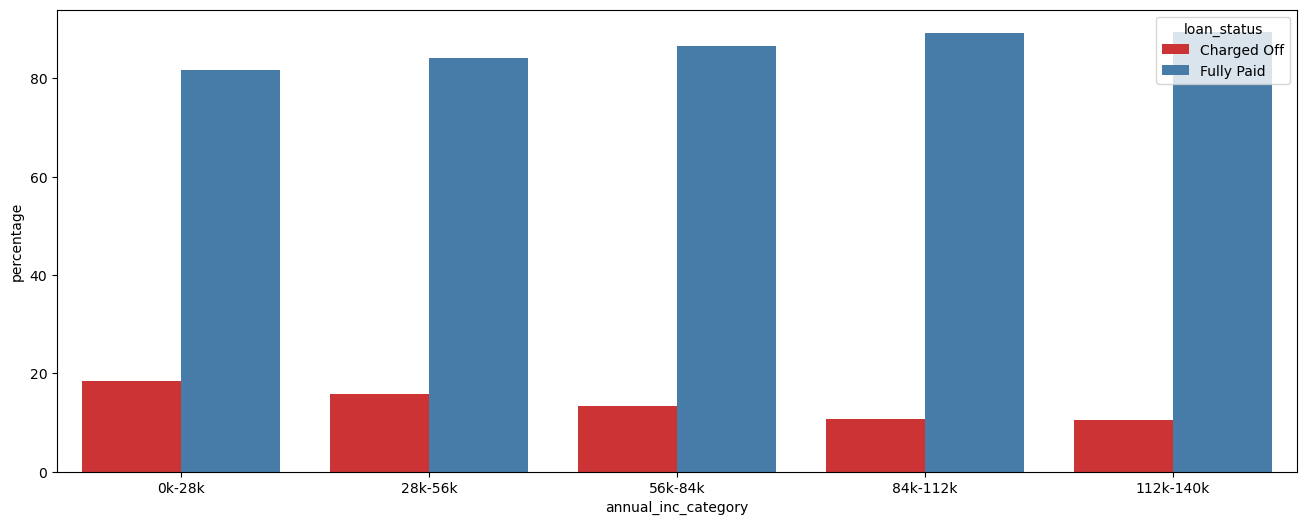

In [369]:
plt.figure(figsize=(16, 6))
sns.barplot(x = 'annual_inc_category' , y = 'percentage' ,hue = 'loan_status', data = loan_annual_inc_category_df,  
              palette = 'Set1')
plt.show()

#### The people with low annual income have more default rate. The highest percentage of defulters can be seen in annual income range from 0 to 28K and second highest default rate is in annual income range from 28k to 56k.

## Observations from above Analysis Part 1:
#### 1. Among all grades, The highest percentage of defaulters(Charged Off) are in grade G (next highest in F and then in E).
#### 2. 60 Months term shows higher percentage of Charged Off Loans, as compared to 36 months.
#### 3. All emp_length values have almost equal percentage of defaulters though emp_length >=10 years have little 
####    higher percentage of defaulters. So emp_length does not seems to have much impact on risk of a loan being Charged Off. 
#### 4. Among all values of 'purpose', highest percentage of defaulters(Charged Off) are there for loans taken for  'small_business'.
#### 5. Home_Ownership has almost no significant impact. Though Home_ownership = OTHER has slightly higher percentage
####    of defaulters(Charged Off loans) as compared to other values of home_ownership. 
#### 6. Different verification_status values shows almost negligible differences in percentages of defaulters, 
####    though verification_status = 'verified' shows (slightly higher than others) highest percentage of defaulted loans
####    as compared to other values of verification_status. So this will have little impact on the risk calculation of a loan.
#### 7. As the loan amount increases the possibility of default(Charged Off loan) increases. The loan_amnt_category with highest loan
####    seems to have highest percentage of loan default(Charged Off). 18k-24k, 24k-30k are two ranges of loan_amnt with highest possibility
####    of a loan being Charged Off as compared to other lower ranges of loan_amnt.
#### 8. Among various interest Rate values, the highest percentage of loan defaults(Charged Off) are for loans where interest rate is 
####    high around 17%-24%. 
#### 9. Installments do not have much impact on the risk of a loan being charged off, though installments ranging from 370-975 have slightly 
####    higher possibility of being charged off as compared to other installment categories.
#### 10.Among all the dti values, the higher percentage of defaults(charged off) can be seen for dti ranging between 18-30.  
####    It can be seen that in general when dti increases the risk of loan being Charged Off increases. 
#### 11.The people with low annual income have more default rate. The highest percentage of defulters can be seen in annual income range     from 0 to 28K and second highest default rate is in annual income range from 28k to 56k.
#### 12.All sub grades show equal percentages of Charged Off and Fully Paid loans. Sub grades individually does 
#### not have much impact on possibility of default

## Understanding the correlation between numerical variables

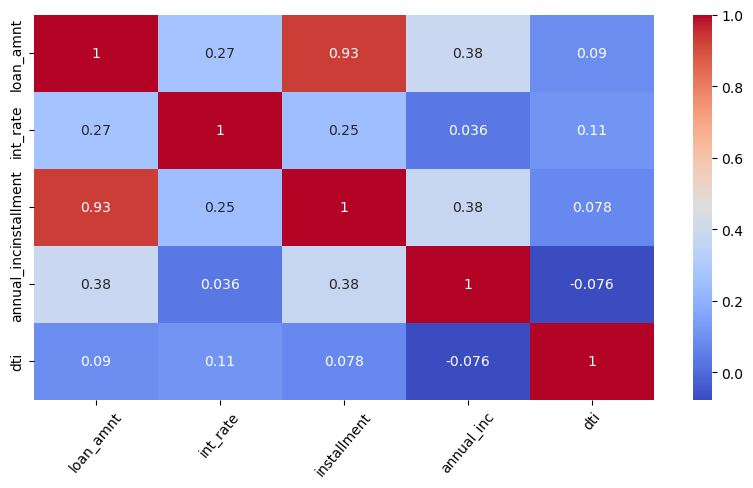

In [122]:
numeric_columns = ['loan_amnt','int_rate','installment','annual_inc','dti']
correlation_matrix = loan_df[numeric_columns].corr()
f,ax = plt.subplots(figsize= (10,5))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()

# Data Analysis Part 2 - using loan_status and two more column

### Analysing loan_amnt with other columns for more insights

### 2.1) Loan amount vs Pursose over loan_status

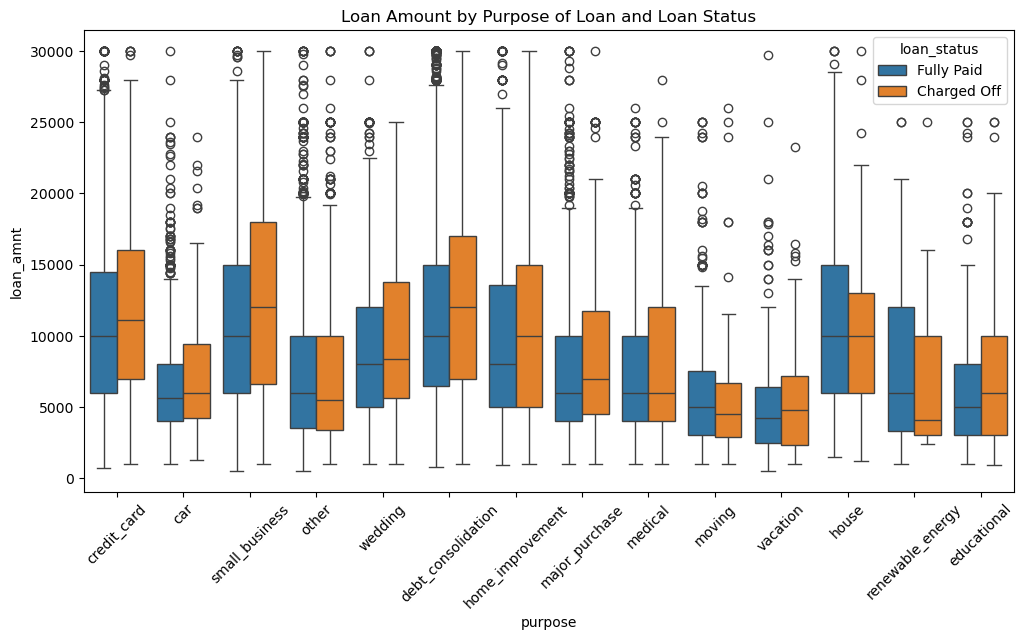

In [219]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='purpose',
    y='loan_amnt',
    hue='loan_status'
)
plt.xticks(rotation=45)
plt.title('Loan Amount by Purpose of Loan and Loan Status')
plt.show()

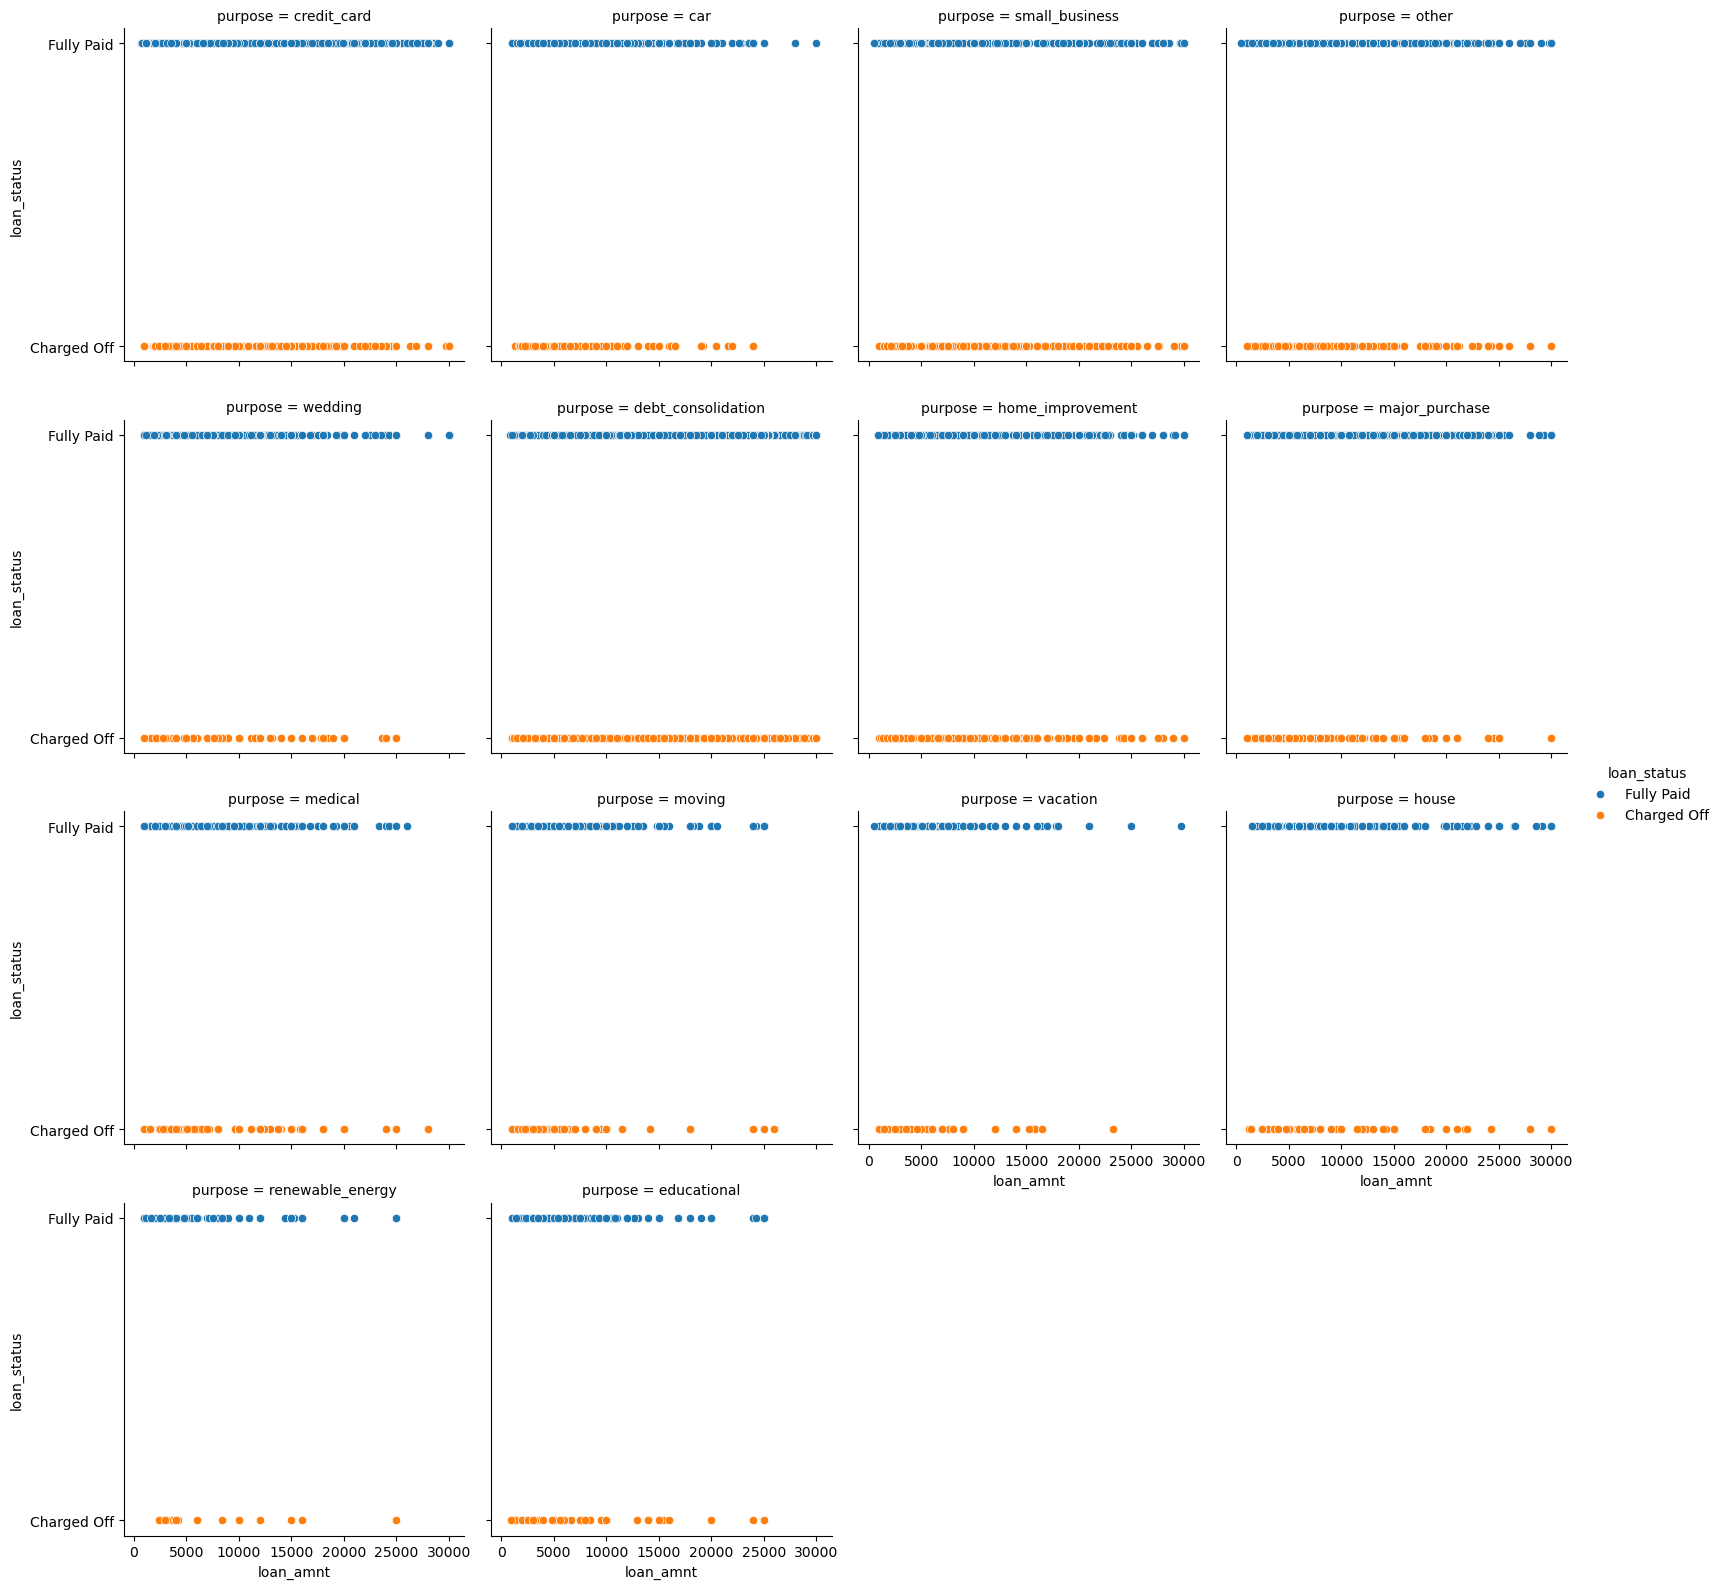

In [225]:
g = sns.FacetGrid(
    loan_df,
    col="purpose",
    hue="loan_status",
    col_wrap=4,
    height=4
)
g.map(sns.scatterplot, "loan_amnt", "loan_status")
g.add_legend()
plt.show()

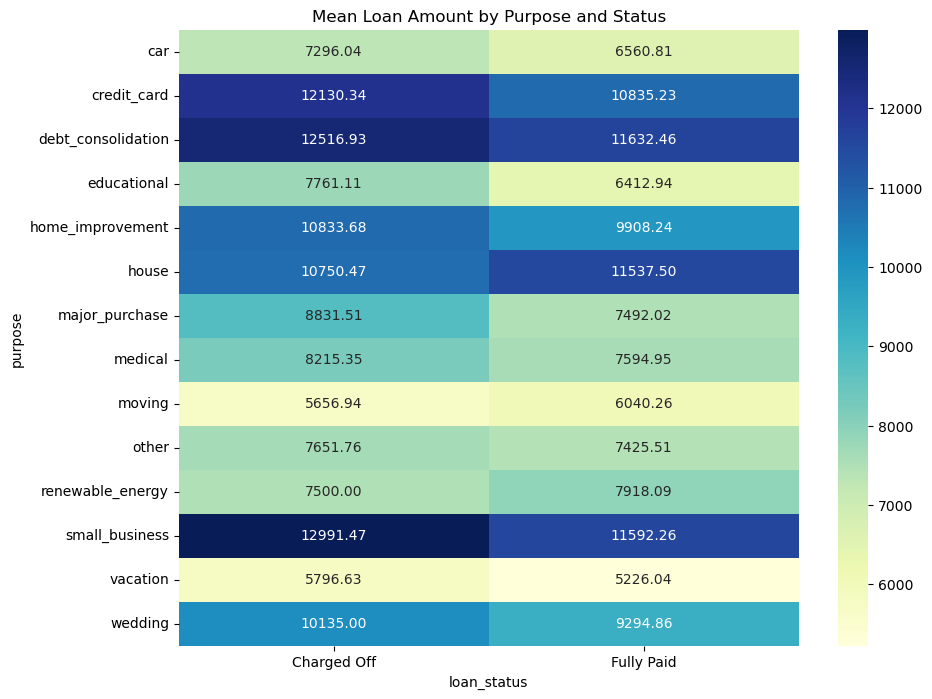

In [229]:
# Pivot data for heatmap
heatmap_data = loan_df.pivot_table(
    index='purpose',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.title('Mean Loan Amount by Purpose and Status')
plt.show()

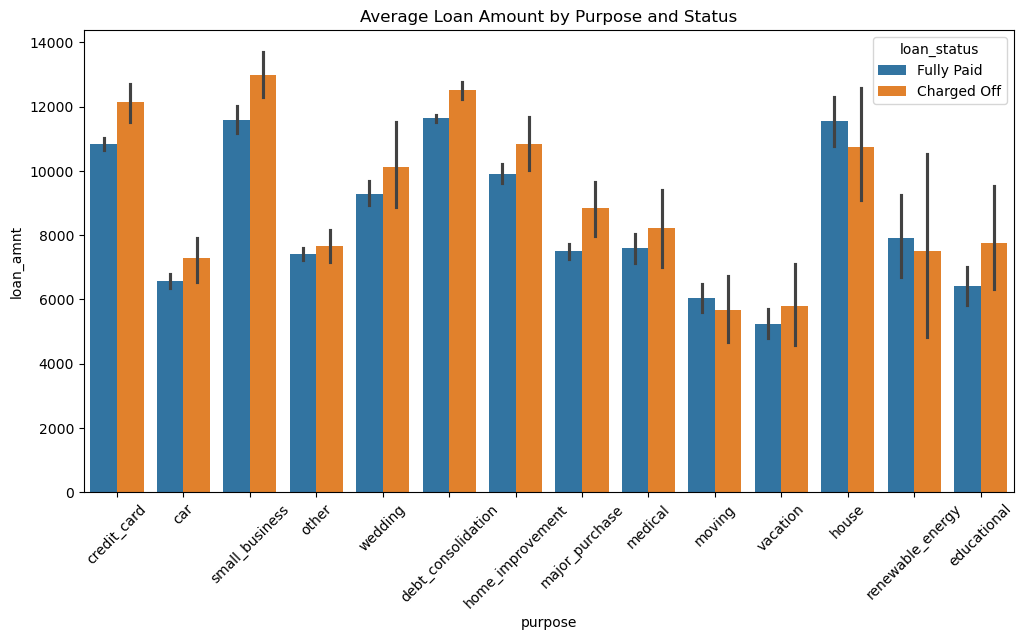

In [236]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='purpose',
    y='loan_amnt',
    hue='loan_status',
    estimator='mean'
)
plt.xticks(rotation=45)
plt.title('Average Loan Amount by Purpose and Status')
plt.show()

#### This again confirms that 'Small_Business' have the highest average loan amount and are most risky type of loan.

### 2.2) Loan amount vs term over loan_status

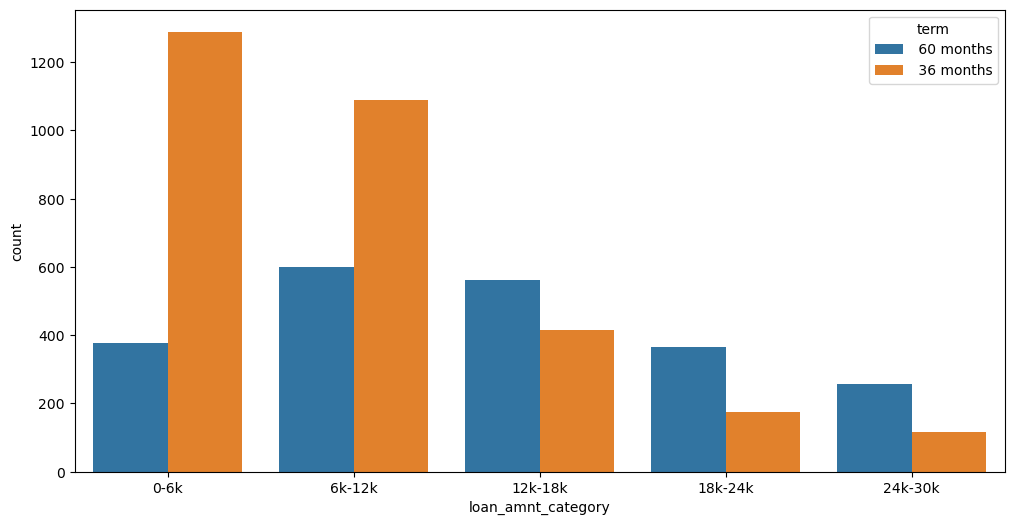

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'term',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

plt.show()

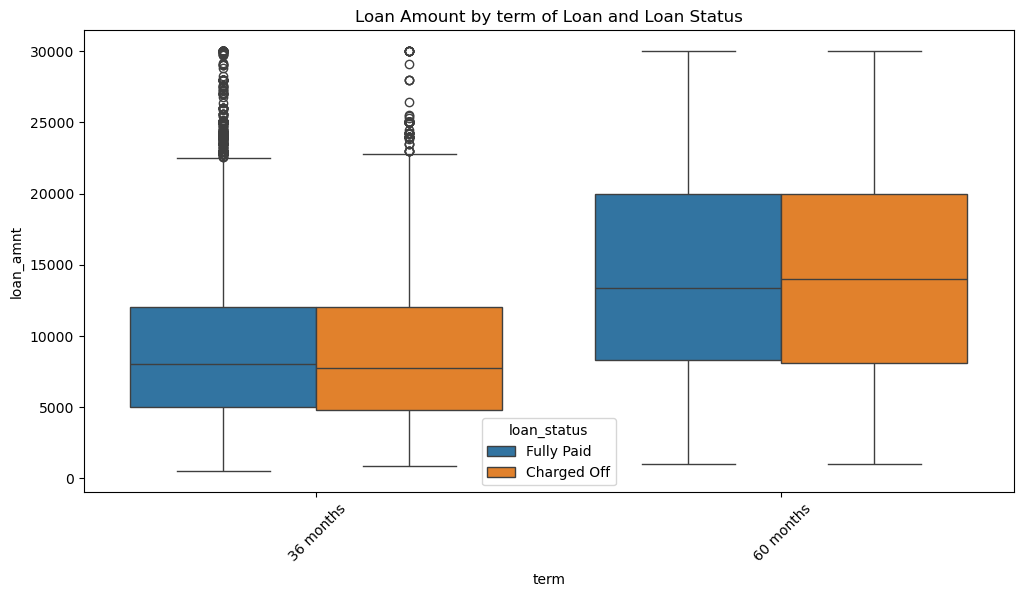

In [240]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='term',
    y='loan_amnt',
    hue='loan_status'
)
plt.xticks(rotation=45)
plt.title('Loan Amount by term of Loan and Loan Status')
plt.show()

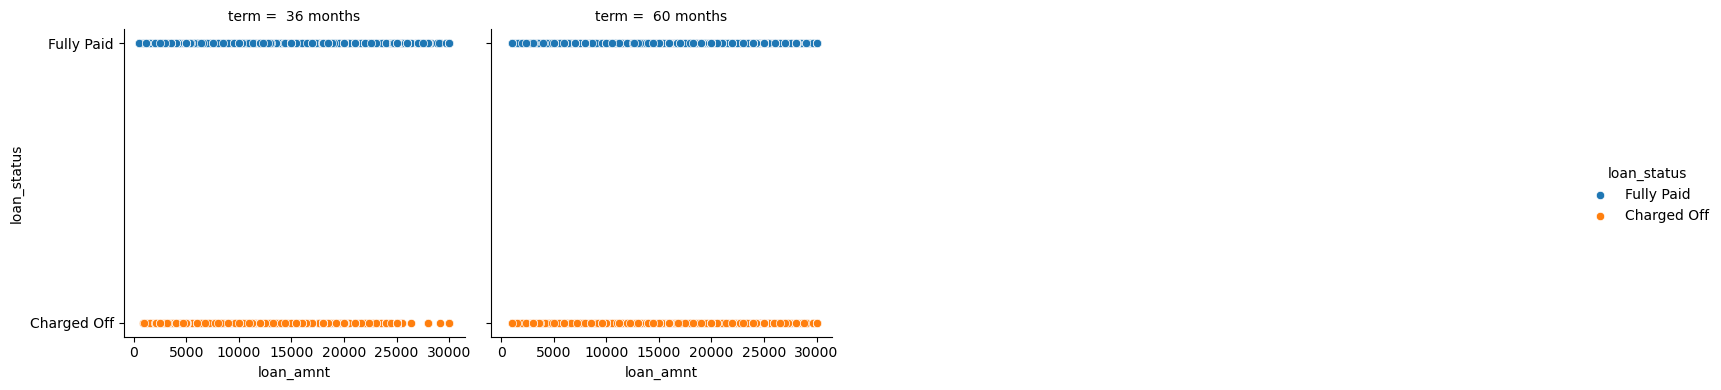

In [242]:
g = sns.FacetGrid(
    loan_df,
    col="term",
    hue="loan_status",
    col_wrap=4,
    height=4
)
g.map(sns.scatterplot, "loan_amnt", "loan_status")
g.add_legend()
plt.show()

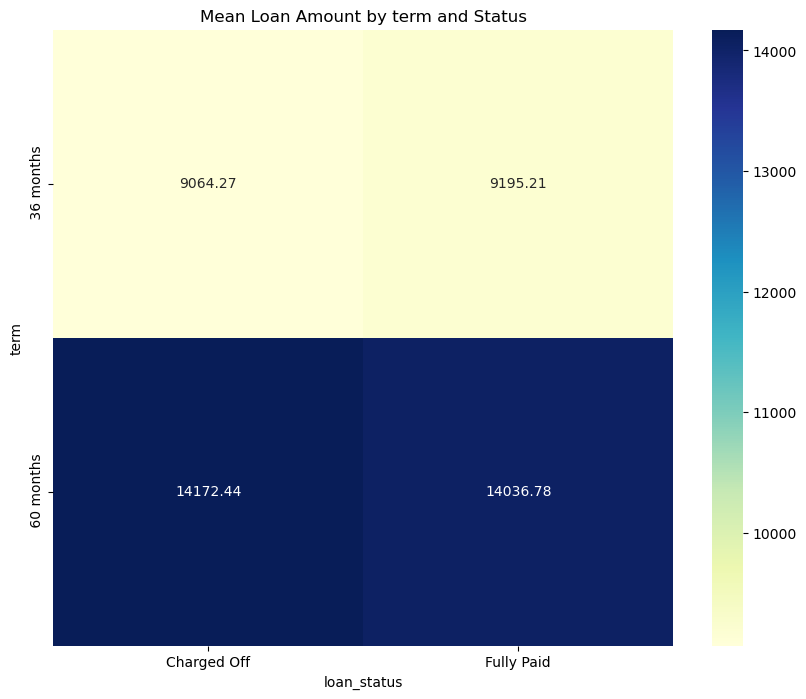

In [244]:
# Pivot data for heatmap
heatmap_data = loan_df.pivot_table(
    index='term',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.title('Mean Loan Amount by term and Status')
plt.show()

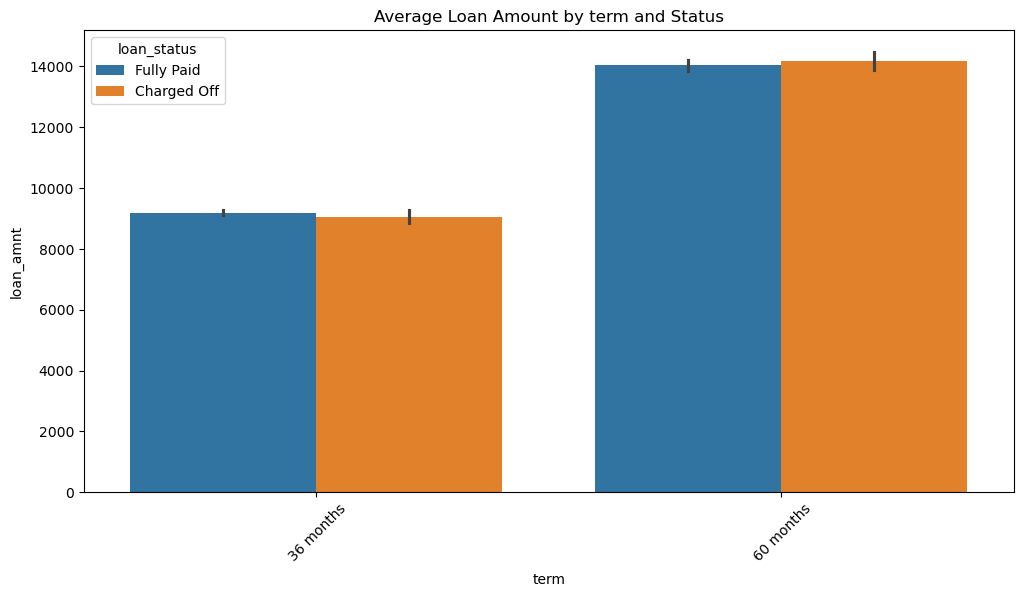

In [246]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='term',
    y='loan_amnt',
    hue='loan_status',
    estimator='mean'
)
plt.xticks(rotation=45)
plt.title('Average Loan Amount by term and Status')
plt.show()

#### 60 Months term have higher mean loan amount. This confirms our two observations that higher loan amount have higher risk of being Charged Off (as we know by previous analysis that 60 months term have higher percentage of Charged Off loans as compared to 36 months term) and 60 Months term is associated with higher risk of being Charged Off.

### 2.3) Loan amount vs interest rate over loan_status

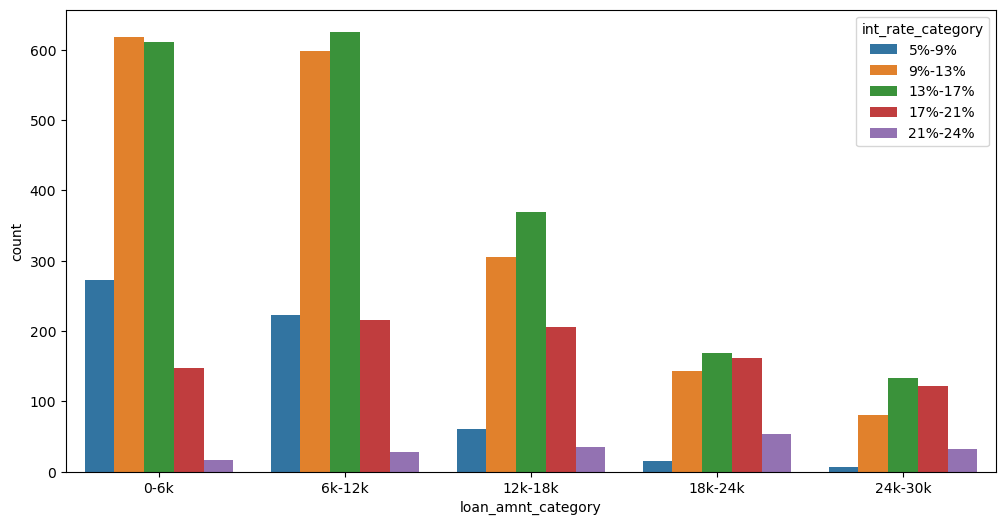

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'int_rate_category',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

plt.show()

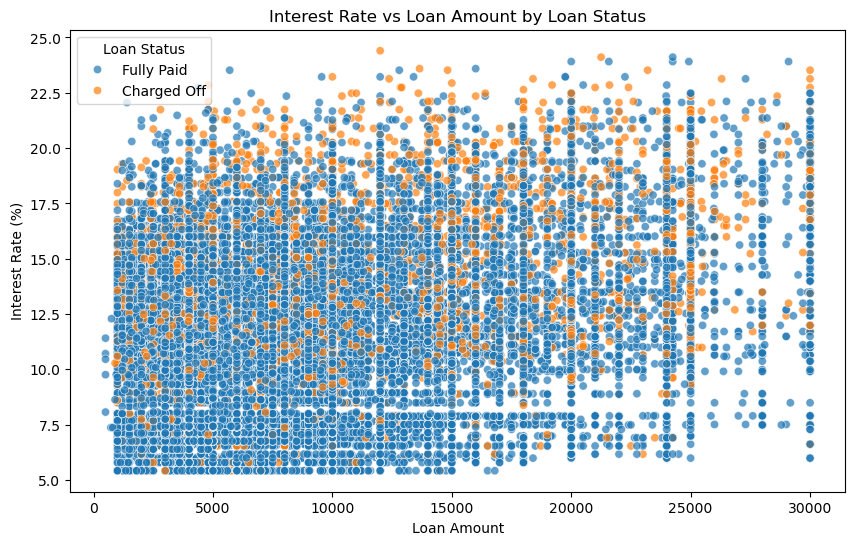

In [250]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=loan_df,
    x='loan_amnt',
    y='int_rate',
    hue='loan_status',
    alpha=0.7
)
plt.title('Interest Rate vs Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status')
plt.show()

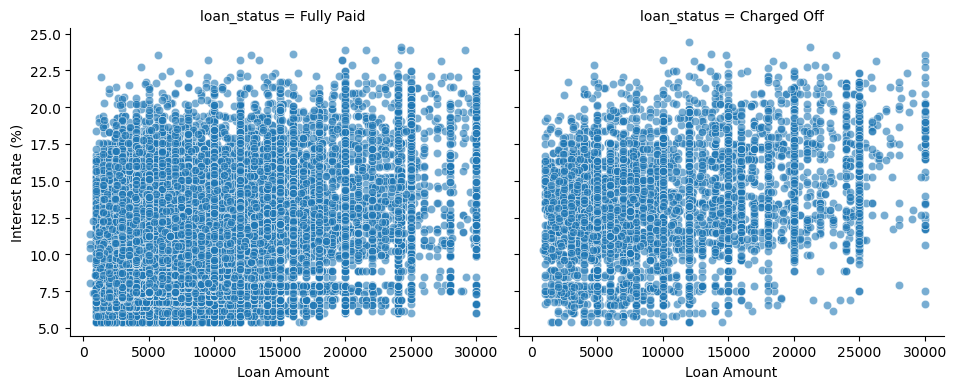

In [256]:
g = sns.FacetGrid(
    loan_df,
    col="loan_status",
    height=4,
    aspect=1.2,
    palette="muted"
)
g.map(sns.scatterplot, "loan_amnt", "int_rate", alpha=0.6)
g.add_legend()
g.set_axis_labels("Loan Amount", "Interest Rate (%)")
plt.show()

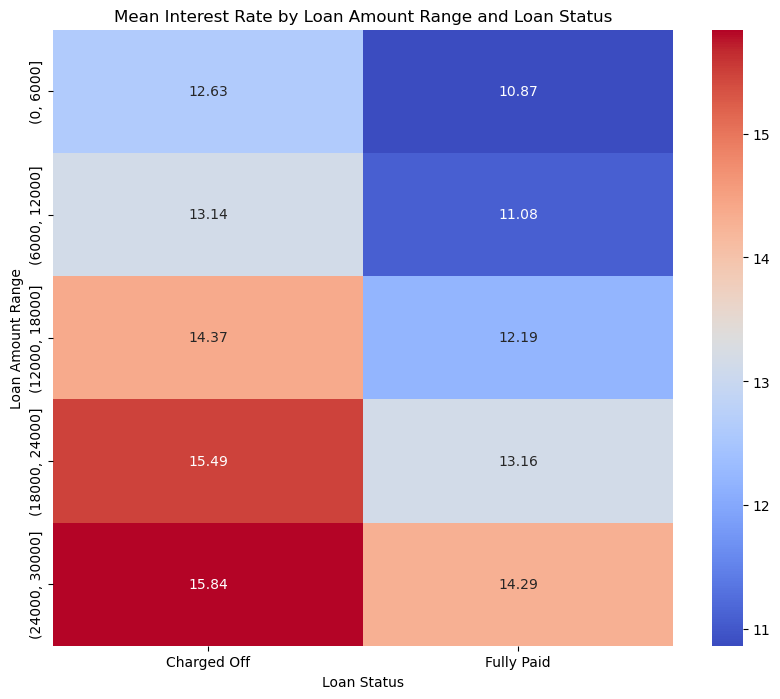

In [260]:
loan_df['loan_amnt_bins'] = pd.cut(loan_df['loan_amnt'], bins=np.arange(0, loan_df['loan_amnt'].max() + 6000, 6000))

# Pivot table
heatmap_data = loan_df.pivot_table(
    index='loan_amnt_bins',
    columns='loan_status',
    values='int_rate',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Mean Interest Rate by Loan Amount Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Range')
plt.show()

#### This shows that higher loan amounts have higher interest rates. And from our previous analysis it was seen that both of these factors are associated with high risk of loan being Charged Off.

### 2.4) Loan amount vs installments over loan_status

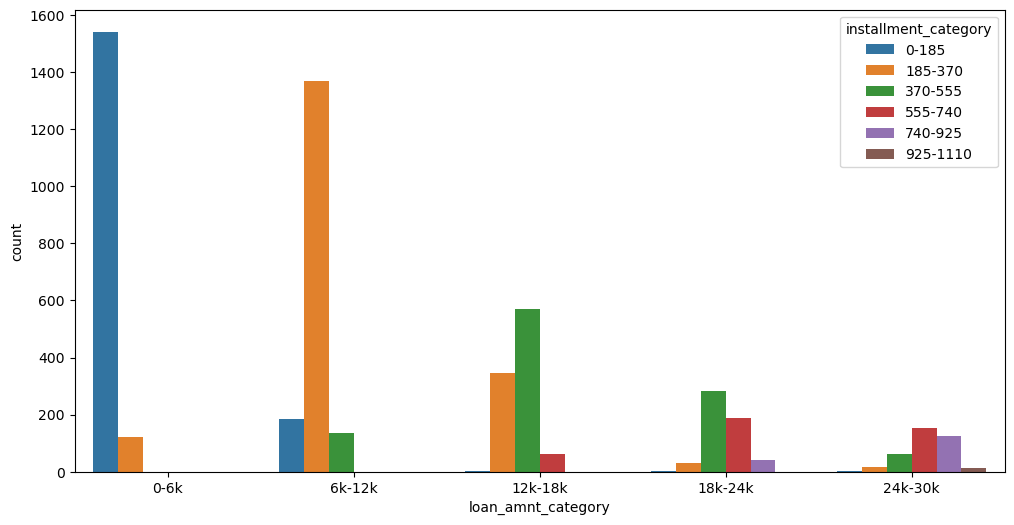

In [133]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'installment_category',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

plt.show()

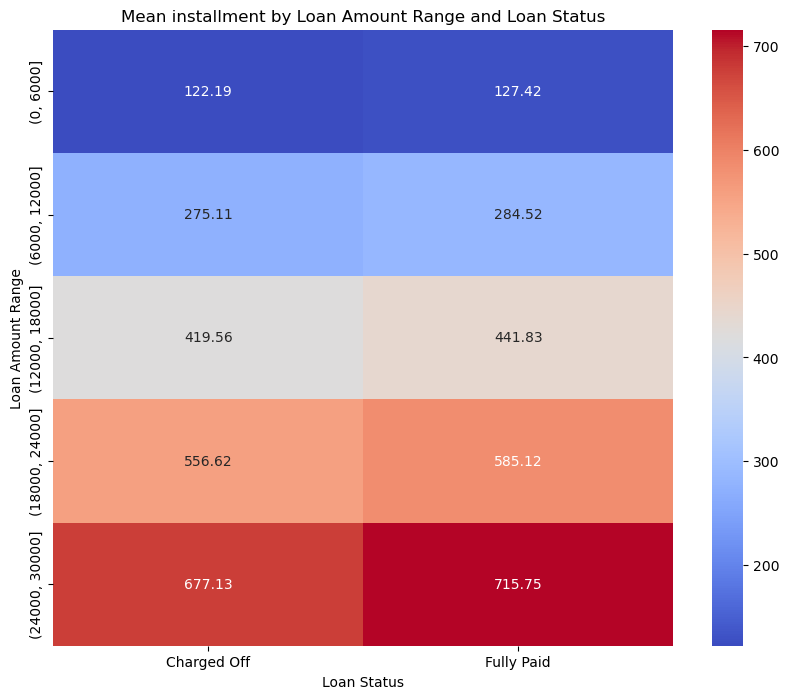

In [267]:
loan_df['loan_amnt_bins'] = pd.cut(loan_df['loan_amnt'], bins=np.arange(0, loan_df['loan_amnt'].max() + 6000, 6000))

# Pivot table
heatmap_data = loan_df.pivot_table(
    index='loan_amnt_bins',
    columns='loan_status',
    values='installment',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Mean installment by Loan Amount Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Range')
plt.show()

#### This shows that the mean installment increases as the loan amount increases.

### 2.5) Loan amount vs Grade over loan_status

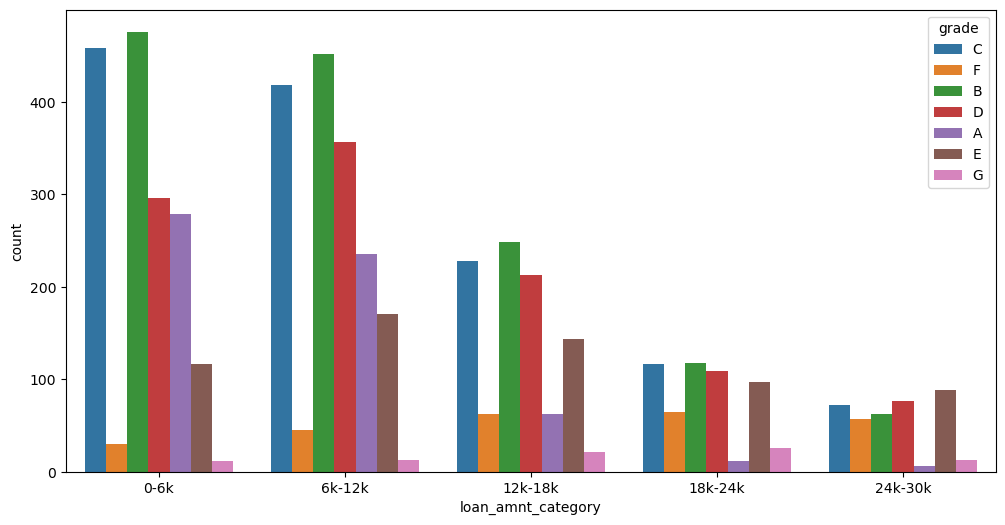

In [135]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'grade',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

plt.show()

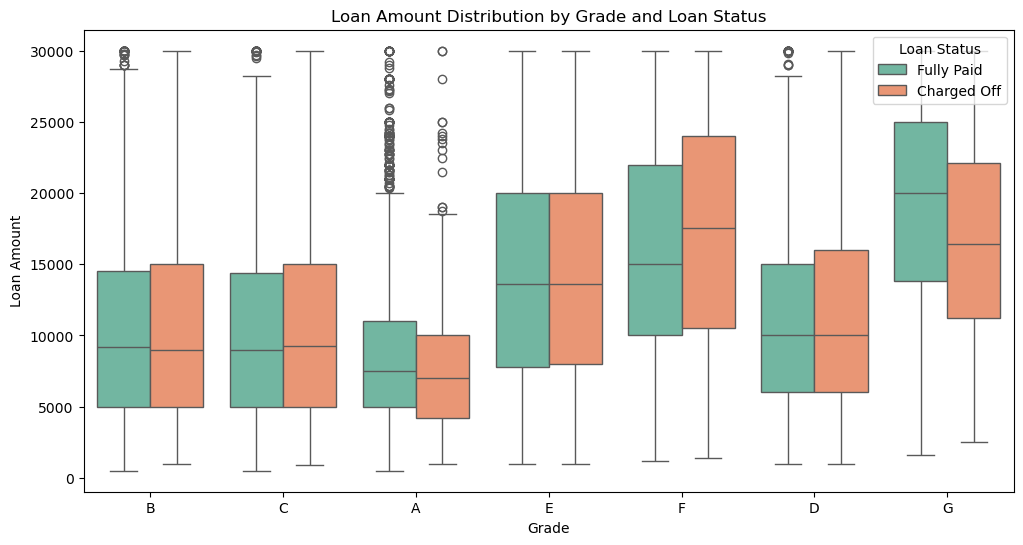

In [271]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='grade',
    y='loan_amnt',
    hue='loan_status',
    palette='Set2'
)
plt.title('Loan Amount Distribution by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

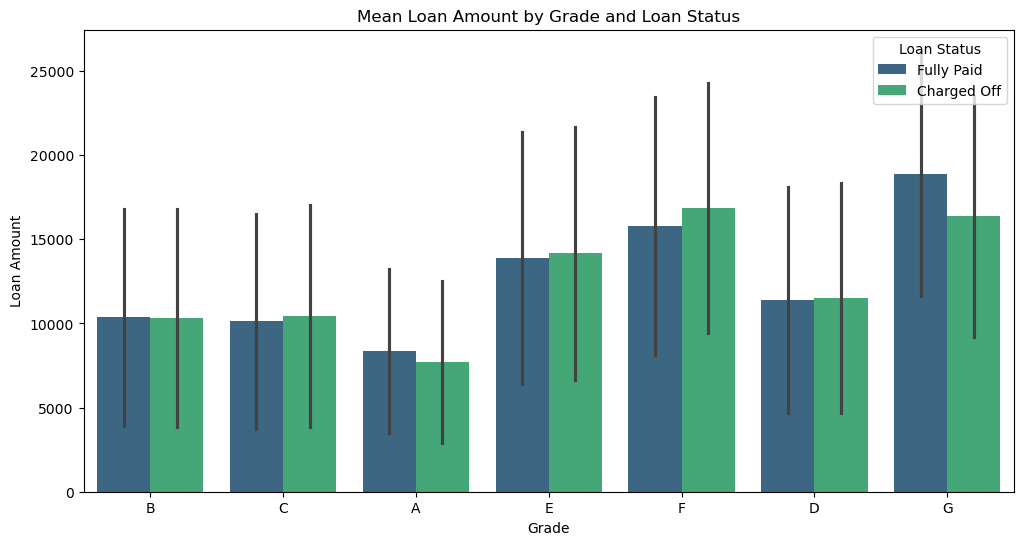

In [273]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='grade',
    y='loan_amnt',
    hue='loan_status',
    ci='sd',
    palette='viridis'
)
plt.title('Mean Loan Amount by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

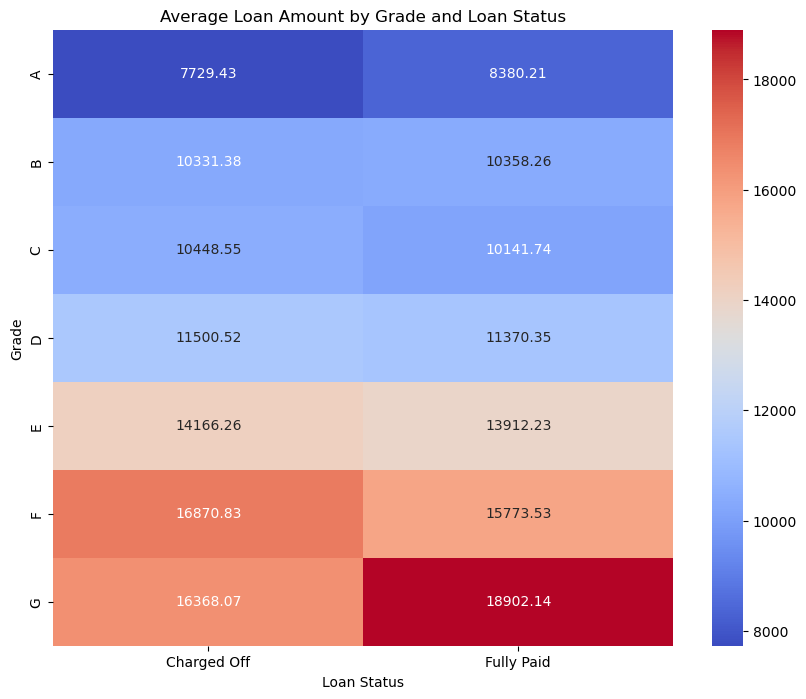

In [275]:
heatmap_data = loan_df.pivot_table(
    index='grade',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Loan Amount by Grade and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.show()

#### Grades E,F,G has higher average loan amounts in the Charged Off segment, as we have seen in previous analysis that these three also have highest percentage of 
#### Charged Off loans as compared to other grades. Thus this confirms our findings. It also confirms a strong link between higher
#### loan amounts being more risky and prone to being Charged Off.

### 2.6) Loan amount vs Employee Length over loan_status

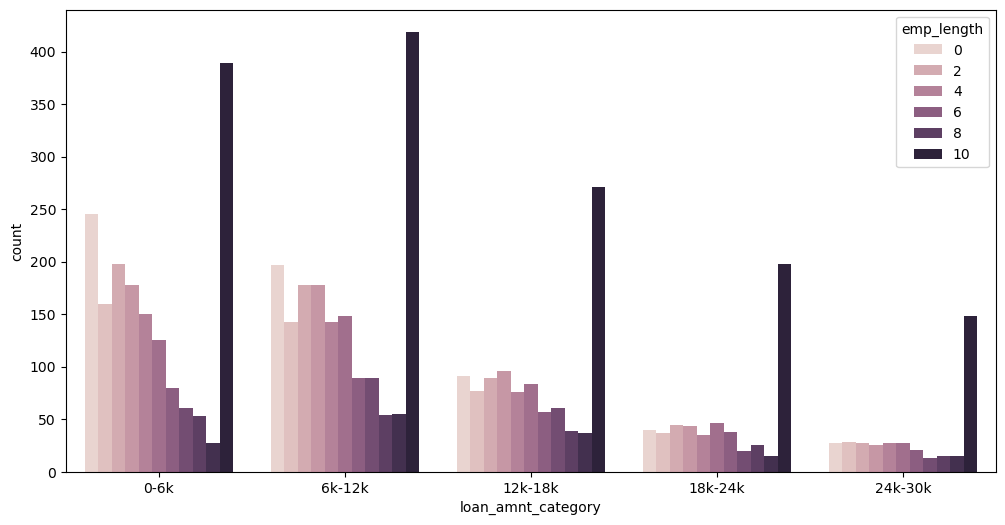

In [137]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'emp_length',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

plt.show()

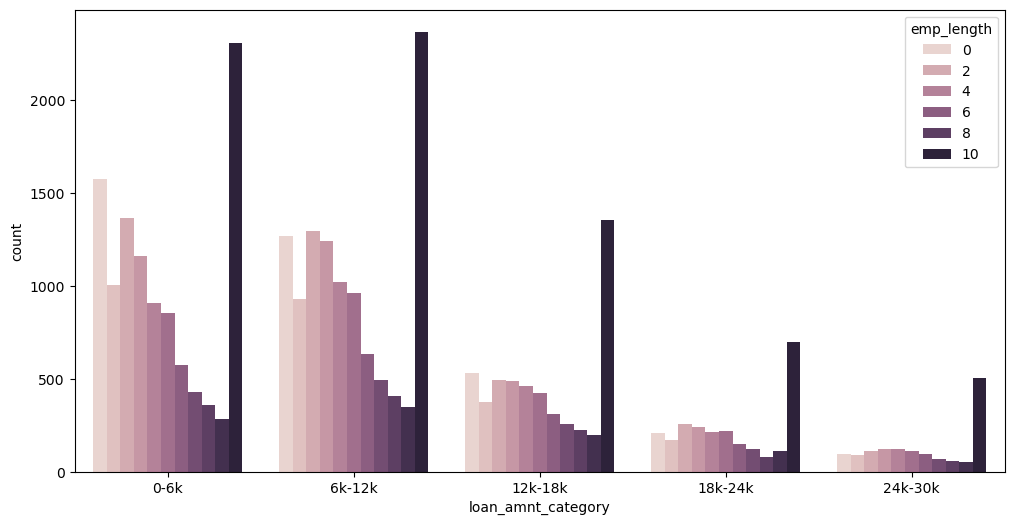

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'emp_length',
              data = loan_df[loan_df.loan_status == 'Fully Paid'])

plt.show()

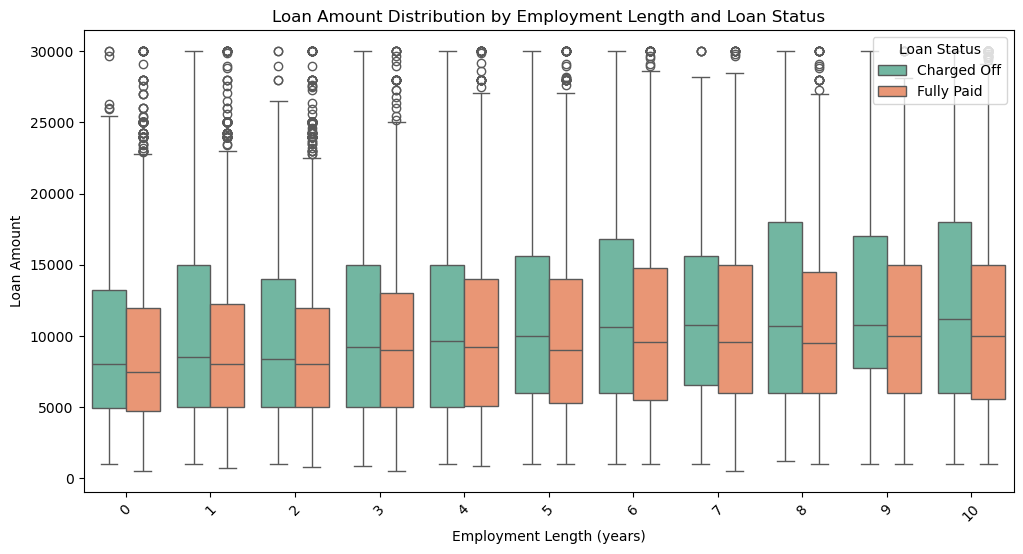

In [280]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='emp_length',
    y='loan_amnt',
    hue='loan_status',
    palette='Set2'
)
plt.title('Loan Amount Distribution by Employment Length and Loan Status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

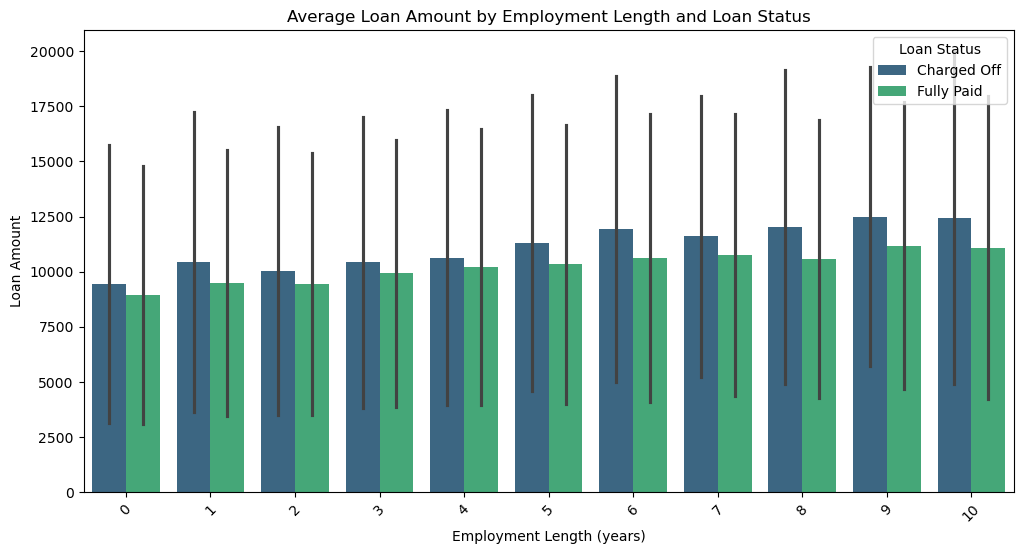

In [282]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='emp_length',
    y='loan_amnt',
    hue='loan_status',
    ci='sd',
    palette='viridis'
)
plt.title('Average Loan Amount by Employment Length and Loan Status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

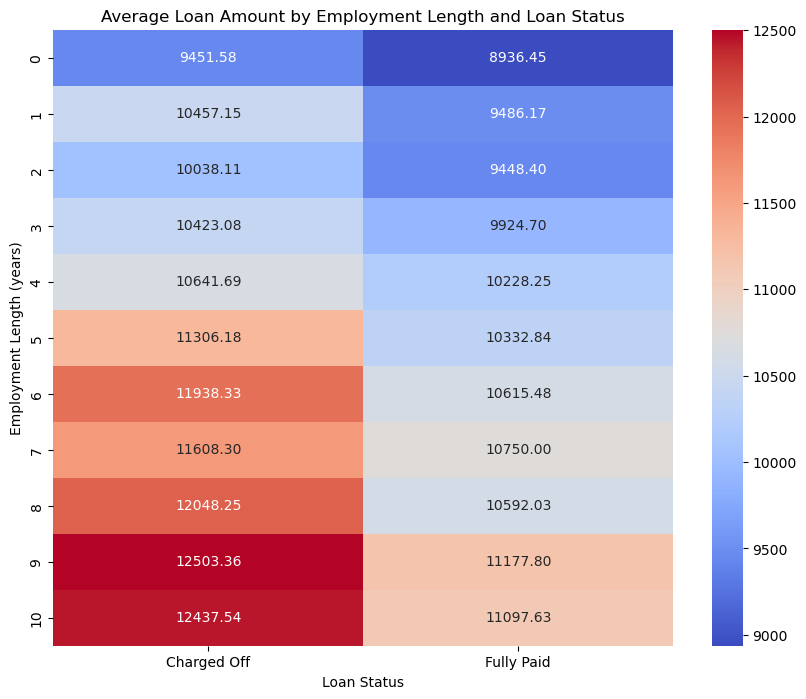

In [284]:
heatmap_data = loan_df.pivot_table(
    index='emp_length',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Loan Amount by Employment Length and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (years)')
plt.show()

#### A slight trend can be seen that the average loan amount increases as the emp_length increases. Also, for same emp_length the charged Off loans have higher average loan amount.

### 2.7) Loan amount vs Home Ownership  over loan_status

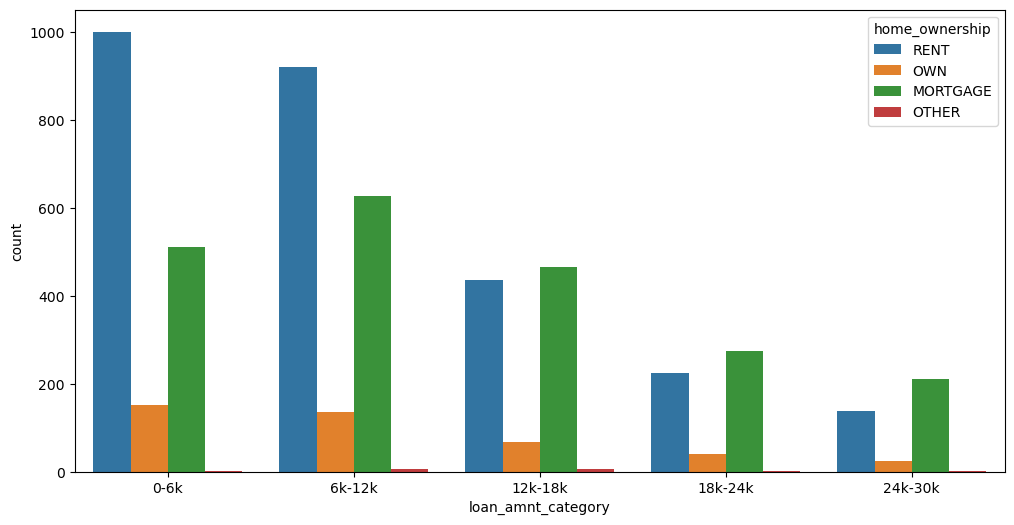

In [140]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'home_ownership',
              data = loan_df[loan_df.loan_status == 'Charged Off'])

plt.show()

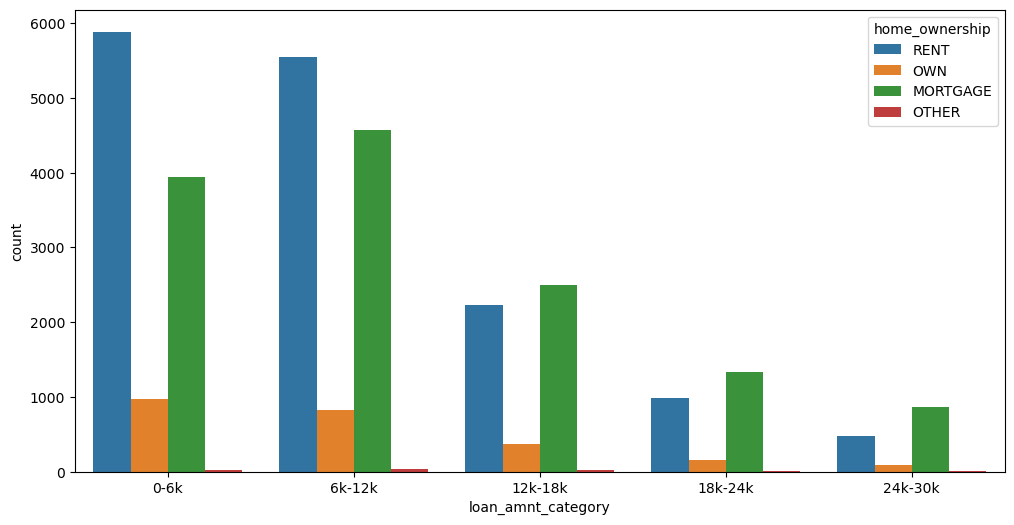

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'loan_amnt_category', hue = 'home_ownership',
              data = loan_df[loan_df.loan_status == 'Fully Paid'])

plt.show()

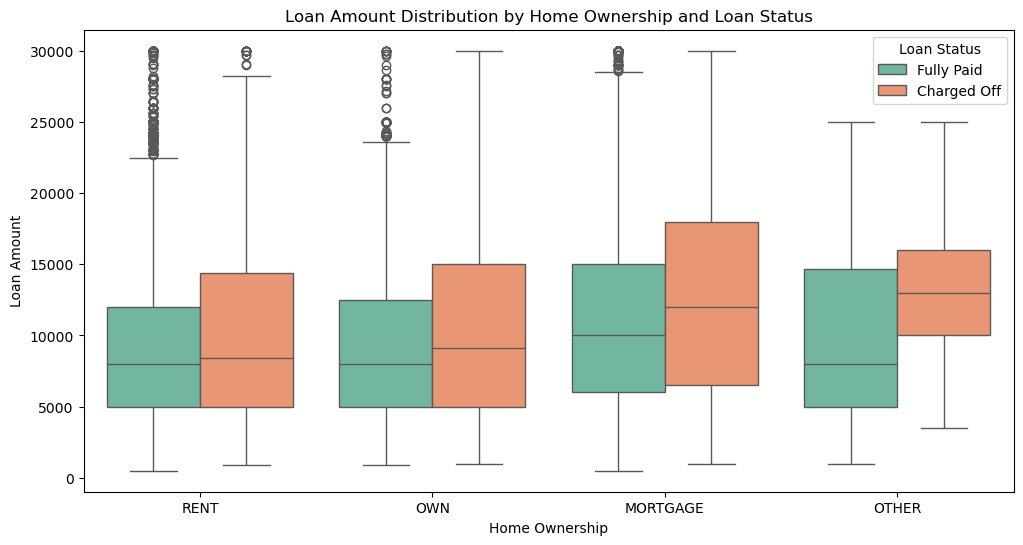

In [287]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='home_ownership',
    y='loan_amnt',
    hue='loan_status',
    palette='Set2'
)
plt.title('Loan Amount Distribution by Home Ownership and Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

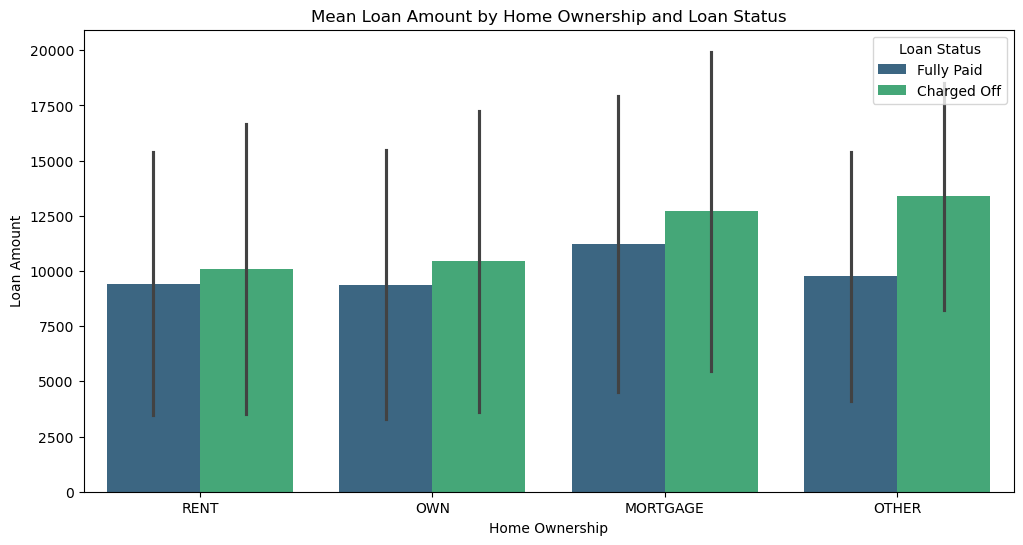

In [289]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='home_ownership',
    y='loan_amnt',
    hue='loan_status',
    ci='sd',
    palette='viridis'
)
plt.title('Mean Loan Amount by Home Ownership and Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

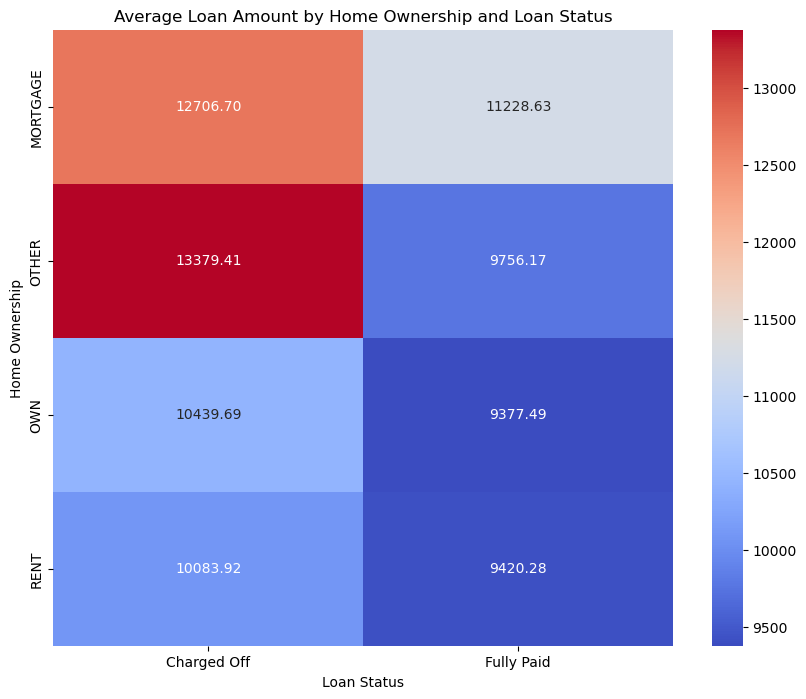

In [293]:
heatmap_data = loan_df.pivot_table(
    index='home_ownership',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Loan Amount by Home Ownership and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Home Ownership')
plt.show()

#### Home_Ownership value 'OTHER' has the highest average loan amount. And from previous analysis it was shown that the home_ownership
#### value 'OTHER' has the highest percentage of Defaulters (Charged Off loans) among various home_ownership values. Also, it can be seen
#### for each category of home_ownership has higher average loan amount for Charged Off as compared to Fully Paid.

### 2.8) Loan amount vs annual_income over loan_status

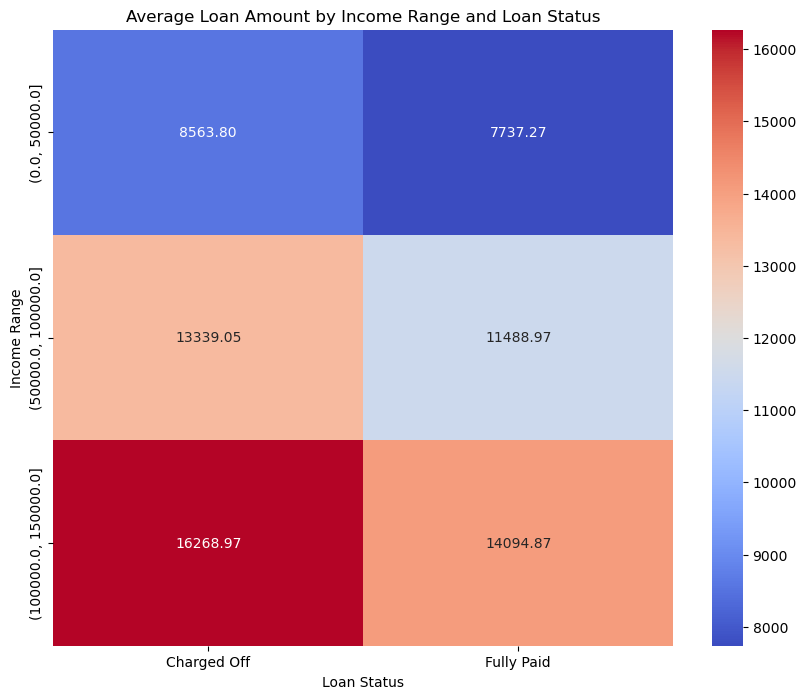

In [304]:
# Create bins for annual income
loan_df['income_bins'] = pd.cut(loan_df['annual_inc'], bins=np.arange(0, loan_df['annual_inc'].max() + 50000, 50000))

# Pivot table
heatmap_data = loan_df.pivot_table(
    index='income_bins',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Loan Amount by Income Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income Range')
plt.show()

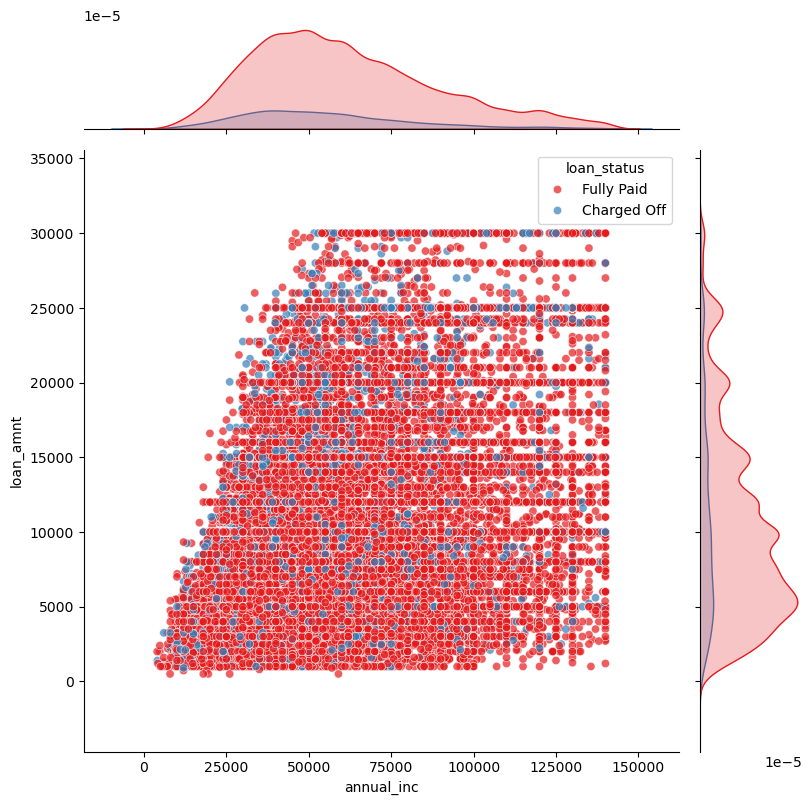

In [306]:
sns.jointplot(
    data=loan_df,
    x='annual_inc',
    y='loan_amnt',
    hue='loan_status',
    kind='scatter',
    alpha=0.7,
    palette='Set1',
    height=8
)
plt.title('Joint Distribution of Annual Income and Loan Amount by Loan Status', pad=50)
plt.show()

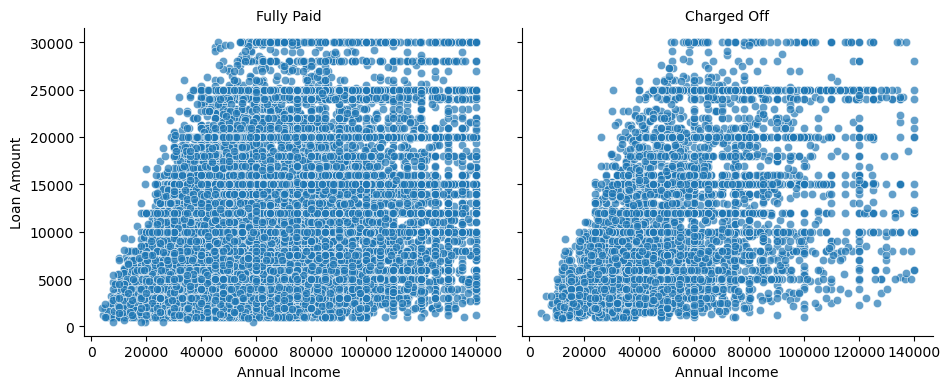

In [308]:
g = sns.FacetGrid(
    loan_df,
    col="loan_status",
    height=4,
    aspect=1.2,
    palette="Set2"
)
g.map(sns.scatterplot, "annual_inc", "loan_amnt", alpha=0.7)
g.set_axis_labels("Annual Income", "Loan Amount")
g.set_titles("{col_name}")
plt.show()

#### From scatter plot, it can be seen that Charged Off loans are mostly concentrated towards the lower income segment (0 to 60k). 
#### Also, it can be seen from heatmap that in each income segment the average loan amount is higher for Charged Off than for Fully Paid 

### 2.9) Loan amount vs Verification Status over loan_status

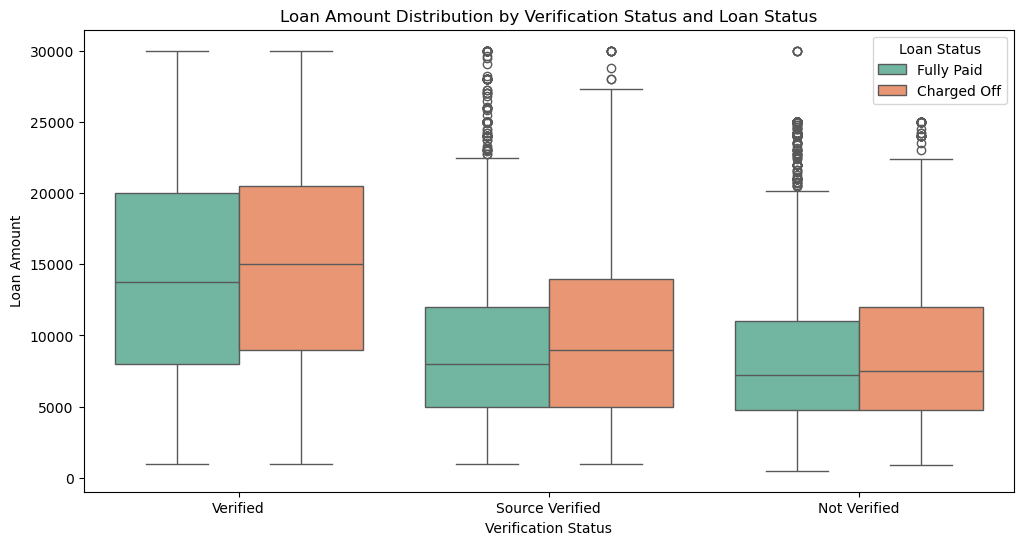

In [314]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='verification_status',
    y='loan_amnt',
    hue='loan_status',
    palette='Set2'
)
plt.title('Loan Amount Distribution by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

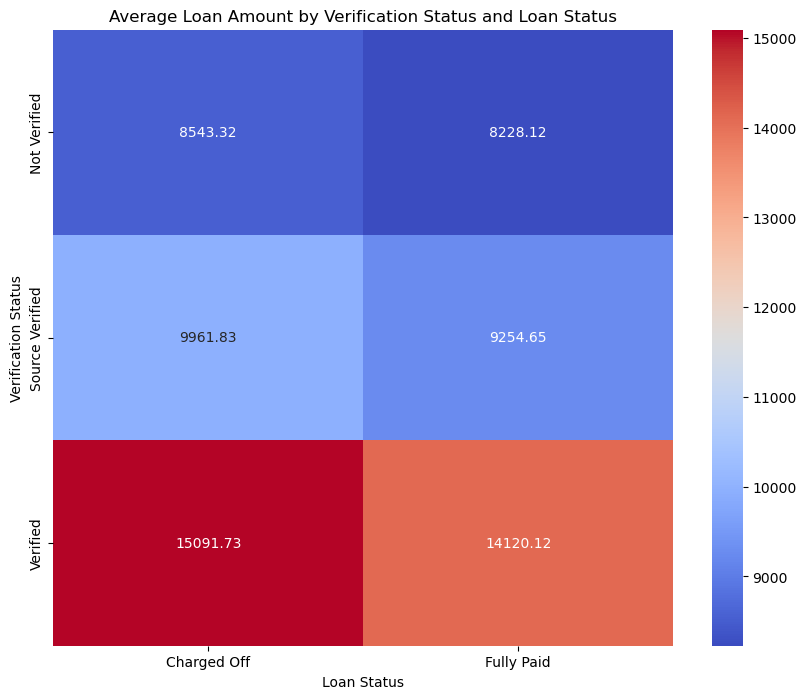

In [316]:
heatmap_data = loan_df.pivot_table(
    index='verification_status',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Loan Amount by Verification Status and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.show()

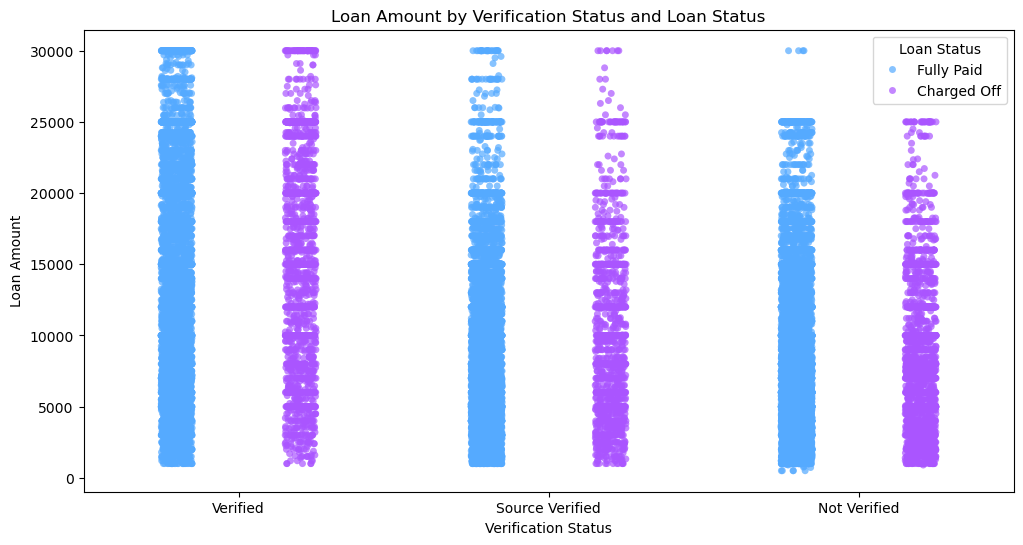

In [320]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=loan_df,
    x='verification_status',
    y='loan_amnt',
    hue='loan_status',
    dodge=True,
    alpha=0.7,
    palette='cool'
)
plt.title('Loan Amount by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

#### From Part 1 analysis it was shown that verification_status 'Verified' has slightly higher percentage of default loans as compared
#### to other values of verification_status. From heatmap it is seen that the highest values for average loan amounts are for 
#### verification_status 'Verified'. Also, for each category of verification_status the Charged Off loans have higher average loan
#### amount than for Fully Paid.

### 2.10) Loan amount vs Debt to Income  over loan_status

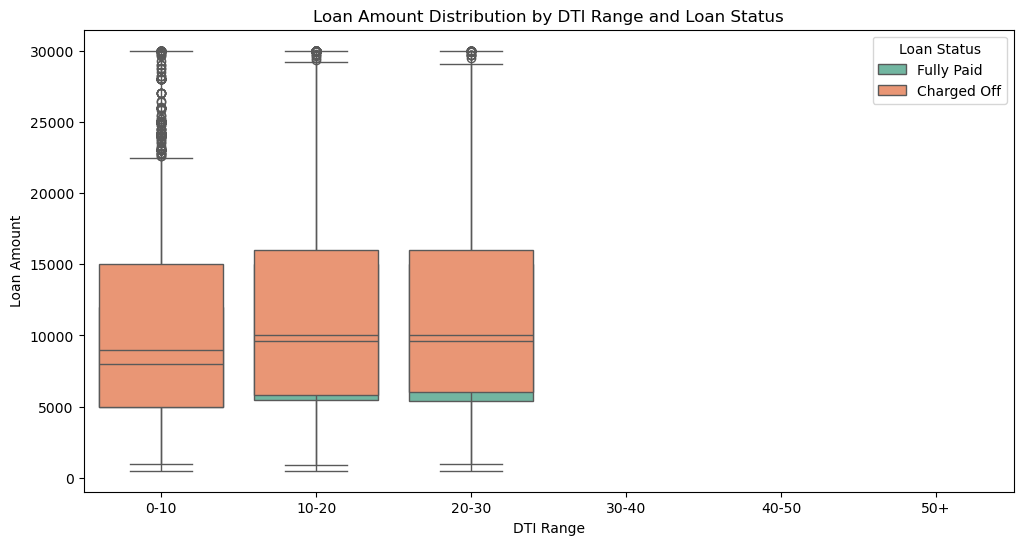

In [329]:
loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins=[0, 10, 20, 30, 40, 50, 100], labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50+"])

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='dti_bins',
    y='loan_amnt',
    hue='loan_status',
    palette='Set2'
)
plt.title('Loan Amount Distribution by DTI Range and Loan Status')
plt.xlabel('DTI Range')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

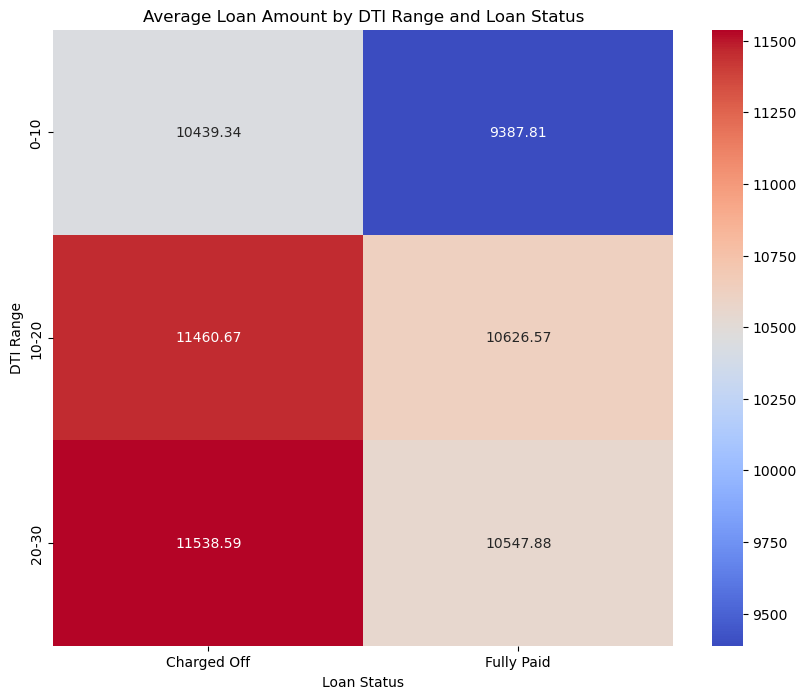

In [331]:
heatmap_data = loan_df.pivot_table(
    index='dti_bins',
    columns='loan_status',
    values='loan_amnt',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Loan Amount by DTI Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI Range')
plt.show()

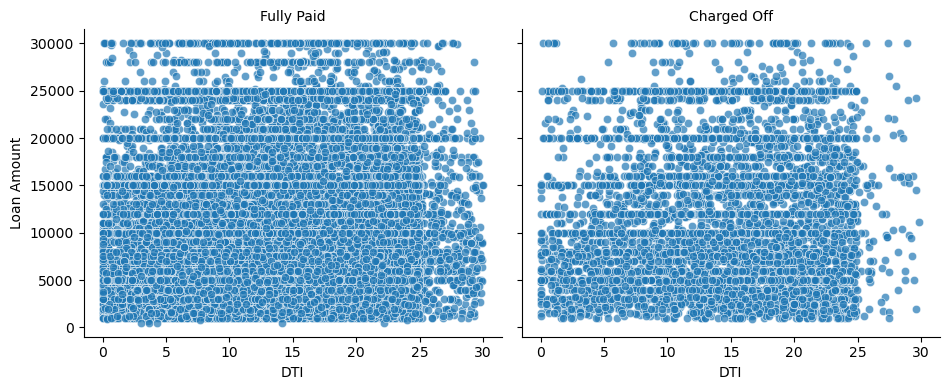

In [335]:
g = sns.FacetGrid(
    loan_df,
    col="loan_status",
    height=4,
    aspect=1.2,
    palette="Set1"
)
g.map(sns.scatterplot, "dti", "loan_amnt", alpha=0.7)
g.set_axis_labels("DTI", "Loan Amount")
g.set_titles("{col_name}")
plt.show()

#### From heatmap it can be seen that for each segment of DTI the average loan amount for Charged Off is higher than for Fully Paid. Also, 
#### from scatter plot it can be seen that most Charged Off loans are located in DTI range of 15-25. From heatmap it can be seen that 
#### higher DTI range has higher average loan amount.

### Analysing annual income with other columns for more insights

### 2.11) Annual income vs Term over loan_status

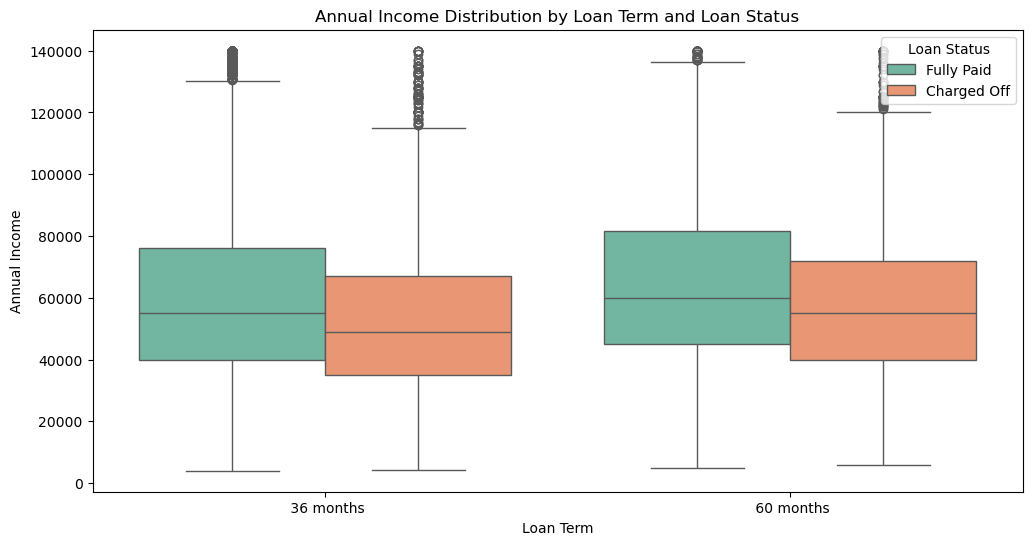

In [355]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='term',
    y='annual_inc',
    hue='loan_status',
    palette='Set2'
)
plt.title('Annual Income Distribution by Loan Term and Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

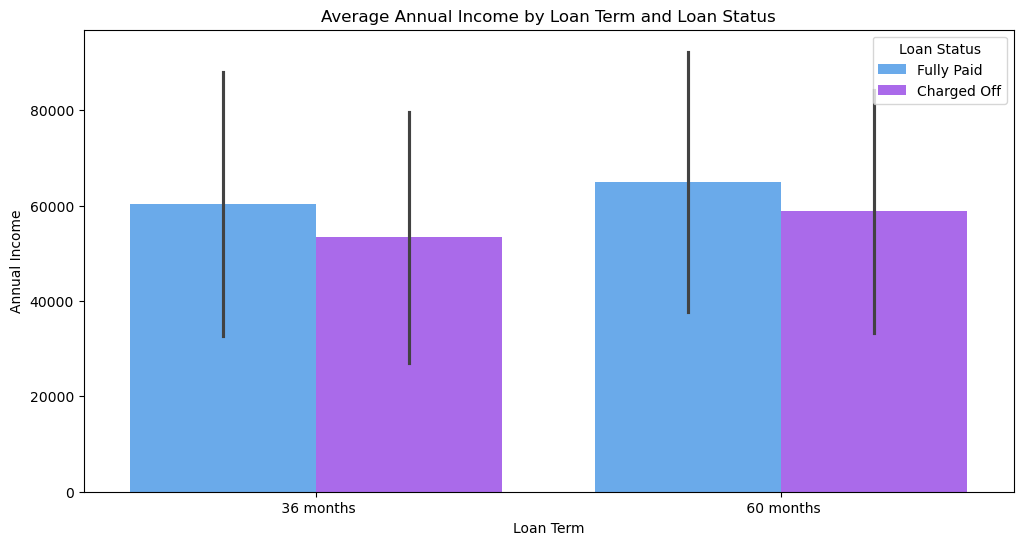

In [357]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='term',
    y='annual_inc',
    hue='loan_status',
    ci='sd',
    palette='cool'
)
plt.title('Average Annual Income by Loan Term and Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

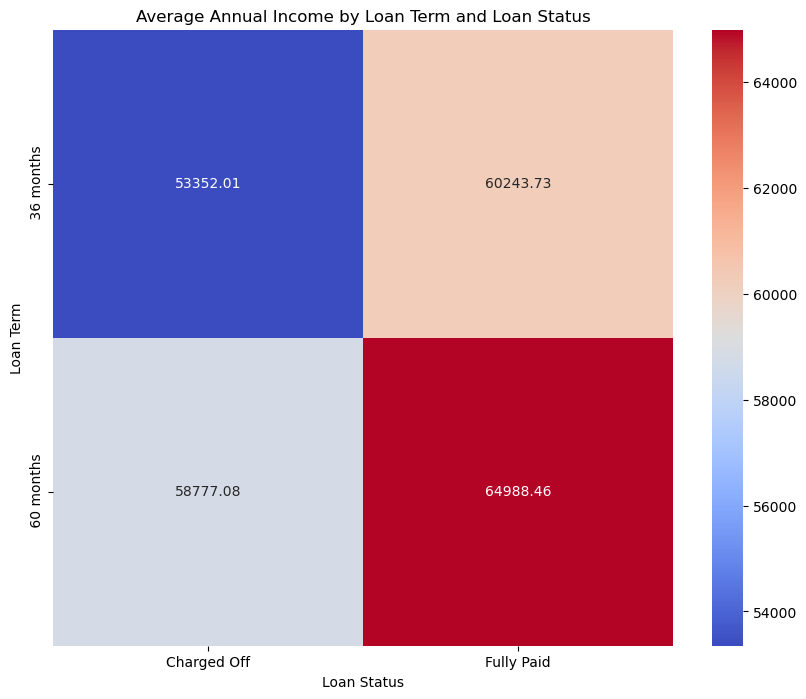

In [359]:
heatmap_data = loan_df.pivot_table(
    index='term',
    columns='loan_status',
    values='annual_inc',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Annual Income by Loan Term and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Term')
plt.show()

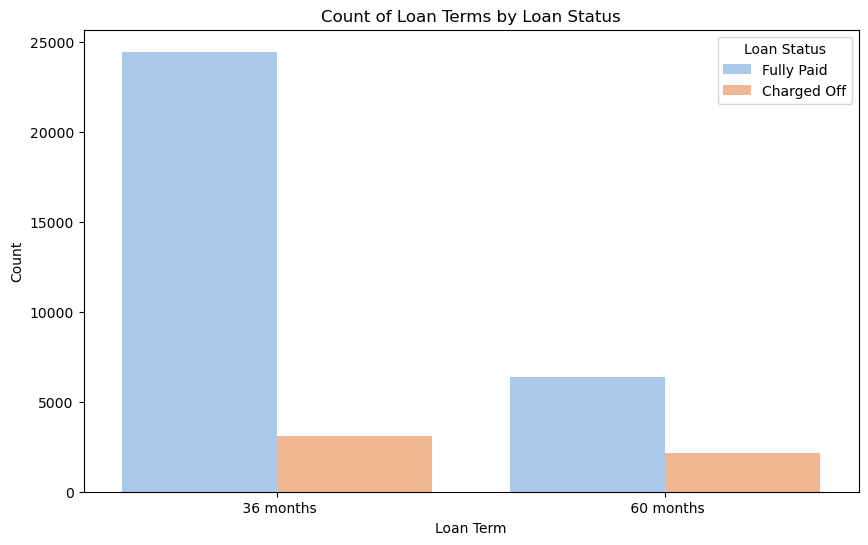

In [363]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=loan_df,
    x='term',
    hue='loan_status',
    palette='pastel'
)
plt.title('Count of Loan Terms by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

#### Average annual income is higher for 60 months terms as compared to 36 months. Also, for same term the average annual income is higher for Charged Off as compared to Fully paid.

### 2.12) Annual income vs Employee Length over loan_status

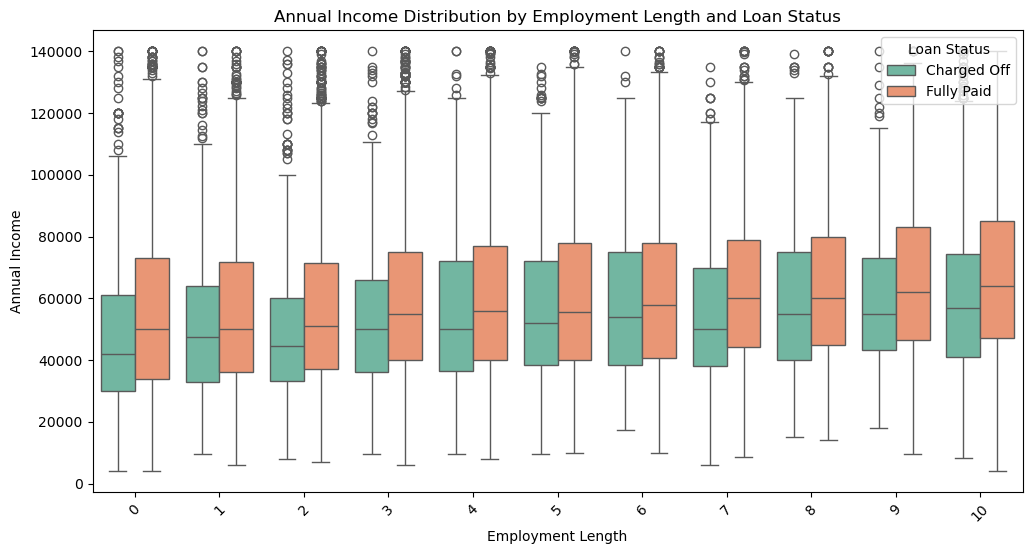

In [367]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='emp_length',
    y='annual_inc',
    hue='loan_status',
    palette='Set2'
)
plt.title('Annual Income Distribution by Employment Length and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

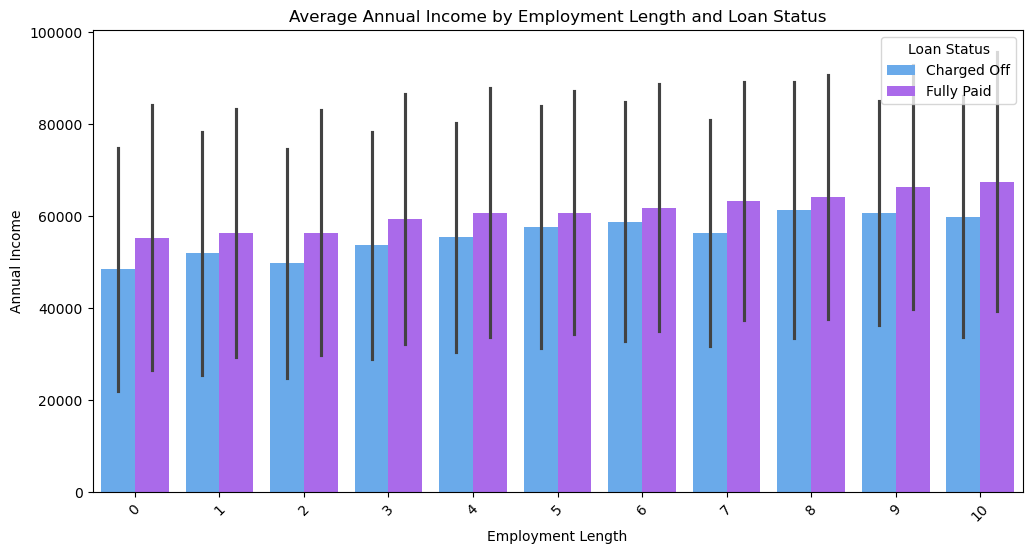

In [369]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='emp_length',
    y='annual_inc',
    hue='loan_status',
    ci='sd',
    palette='cool'
)
plt.title('Average Annual Income by Employment Length and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

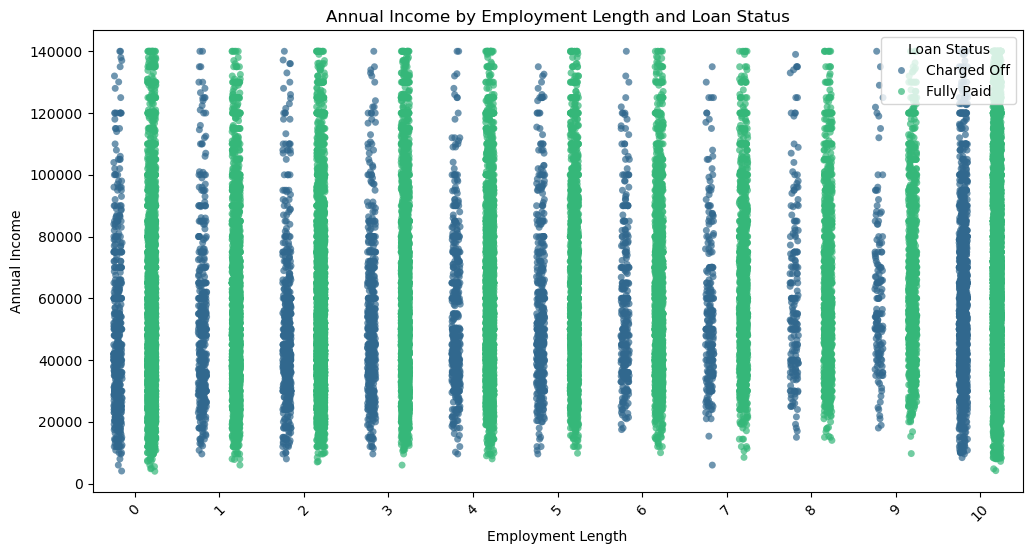

In [371]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=loan_df,
    x='emp_length',
    y='annual_inc',
    hue='loan_status',
    dodge=True,
    alpha=0.7,
    palette='viridis'
)
plt.title('Annual Income by Employment Length and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

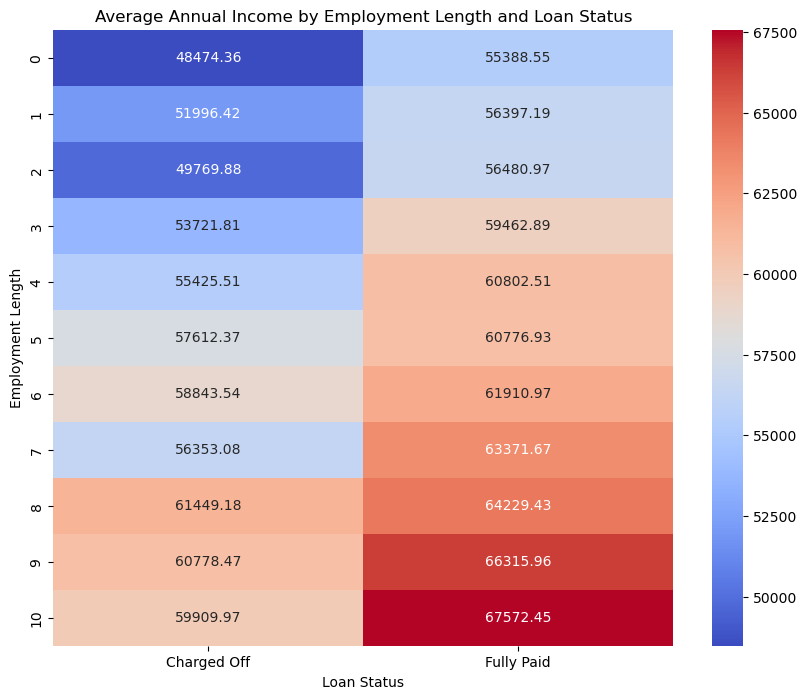

In [373]:
heatmap_data = loan_df.pivot_table(
    index='emp_length',
    columns='loan_status',
    values='annual_inc',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Annual Income by Employment Length and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length')
plt.show()

#### It can be seen that as emp_length increases the average annual income increases. Also, it can be seen from heat map that in each emp_length segment the Fully Paid loans have higher average annual income than the Charged Off

### 2.13) Annual income vs Debt to Income over loan_status

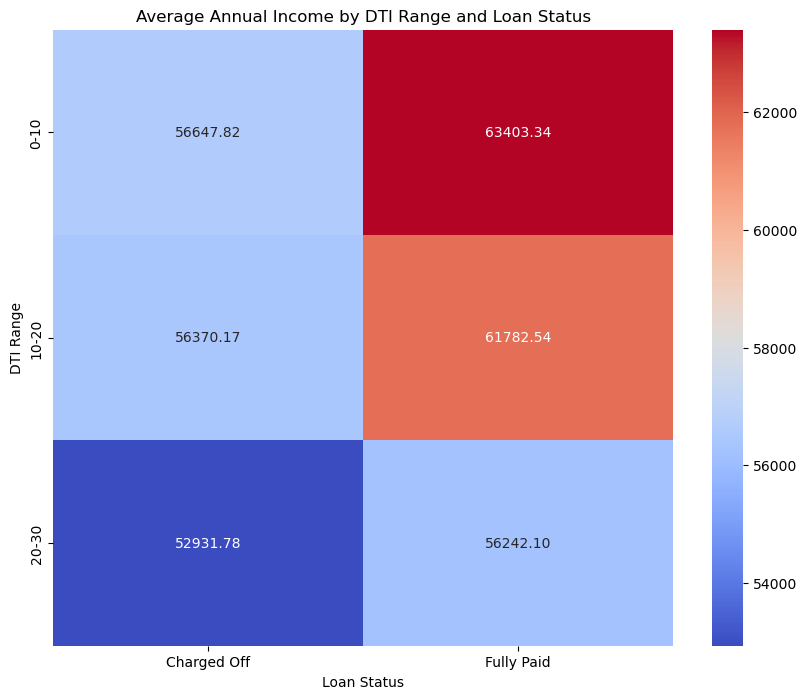

In [383]:
heatmap_data = loan_df.pivot_table(
    index='dti_bins',
    columns='loan_status',
    values='annual_inc',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Annual Income by DTI Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI Range')
plt.show()

#### As the DTI increases the average annual income decreases. For the same category of DTI the Fully Paid loans have higher income than the Charged Off loans.

### Analysing interst rate with other columns for more insights

### 2.14) Interest Rate and Debt To Incoome

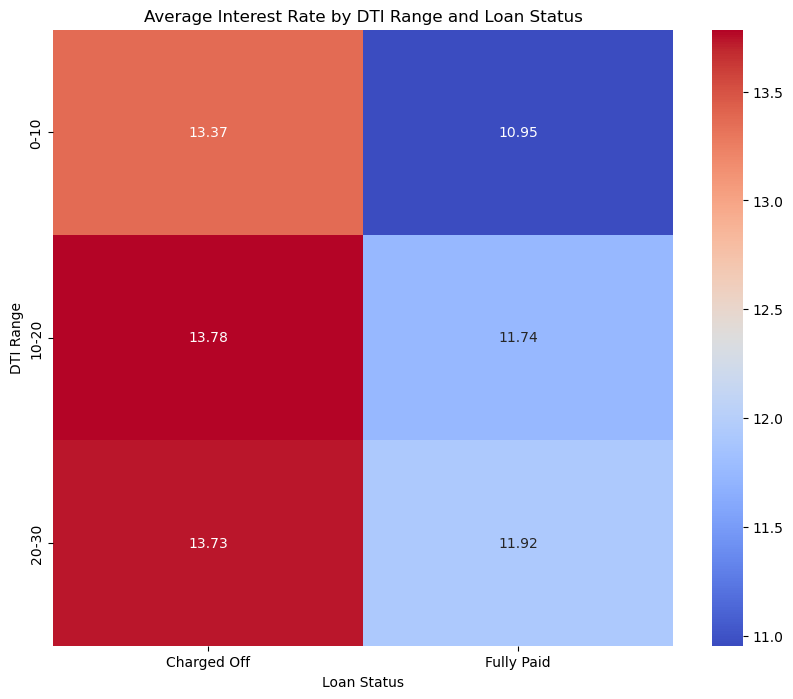

In [401]:
heatmap_data = loan_df.pivot_table(
    index='dti_bins',
    columns='loan_status',
    values='int_rate',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Interest Rate by DTI Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI Range')
plt.show()

#### Average Interest rates are low for Fully paid Loans as compared to Charged Off loans.

### 2.15) Interest Rate and Instalment

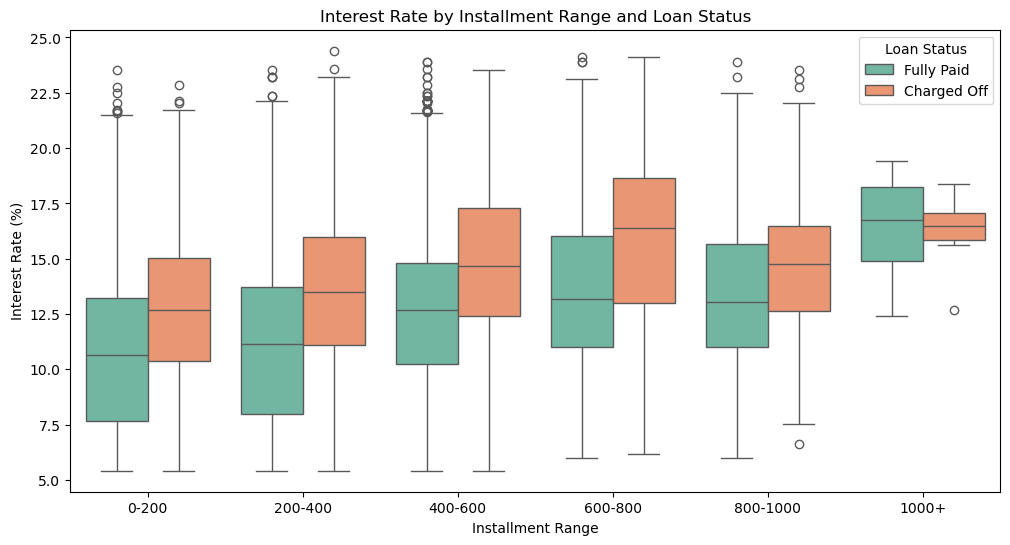

In [408]:
loan_df['installment_bins'] = pd.cut(
    loan_df['installment'], bins=[0, 200, 400, 600, 800, 1000, 2000],
    labels=["0-200", "200-400", "400-600", "600-800", "800-1000", "1000+"]
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='installment_bins',
    y='int_rate',
    hue='loan_status',
    palette='Set2'
)
plt.title('Interest Rate by Installment Range and Loan Status')
plt.xlabel('Installment Range')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

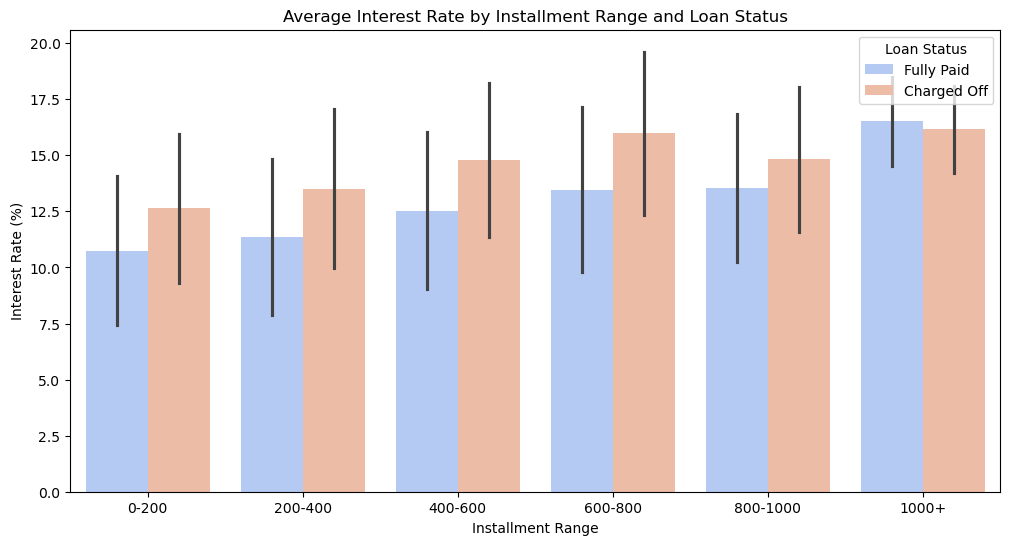

In [410]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='installment_bins',
    y='int_rate',
    hue='loan_status',
    ci='sd',
    palette='coolwarm'
)
plt.title('Average Interest Rate by Installment Range and Loan Status')
plt.xlabel('Installment Range')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

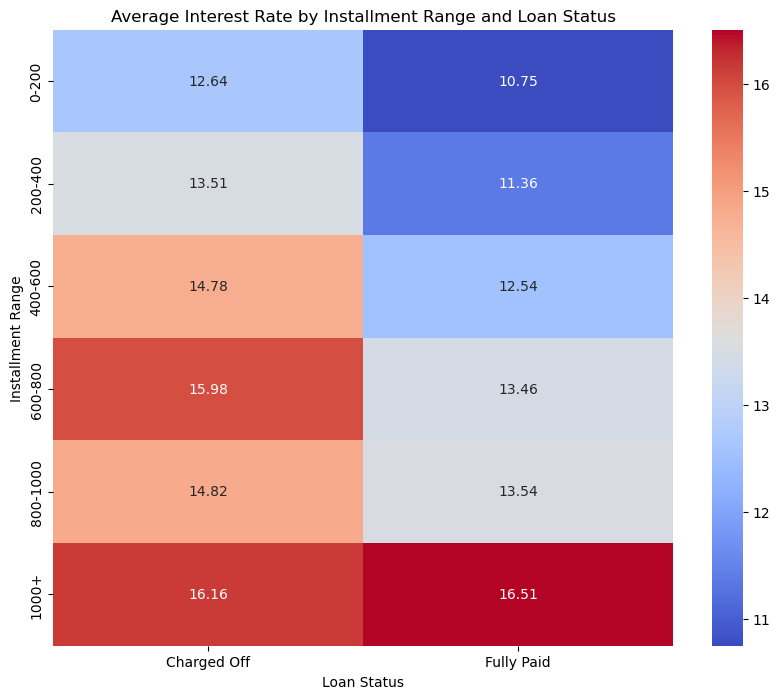

In [412]:
heatmap_data = loan_df.pivot_table(
    index='installment_bins',
    columns='loan_status',
    values='int_rate',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Interest Rate by Installment Range and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Installment Range')
plt.show()

#### Average interest rate increases as number of installments increases. From previous analysis higher interest rates are linked with higher Charged off loans.

### 2.16) Interest Rate and Verfication Status

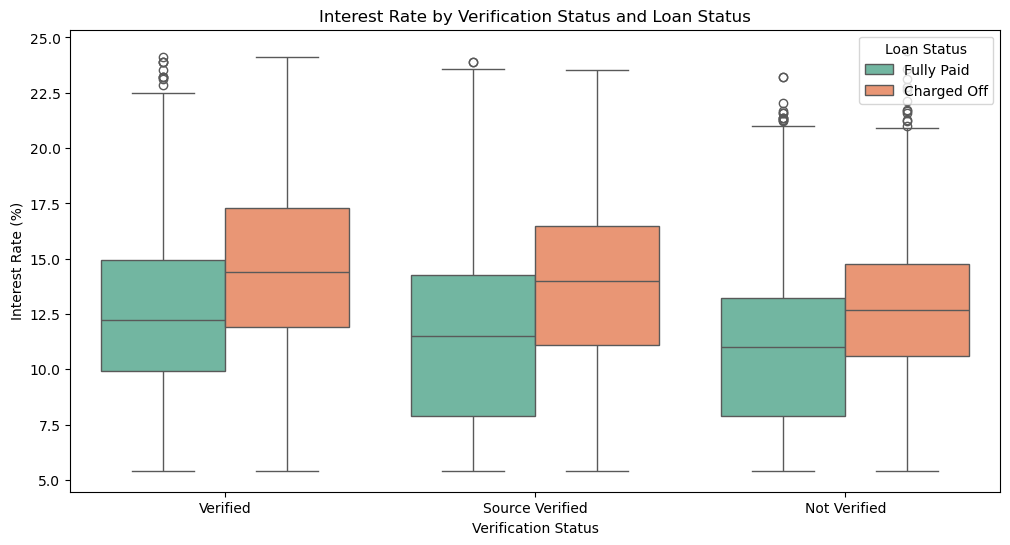

In [417]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=loan_df,
    x='verification_status',
    y='int_rate',
    hue='loan_status',
    palette='Set2'
)
plt.title('Interest Rate by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

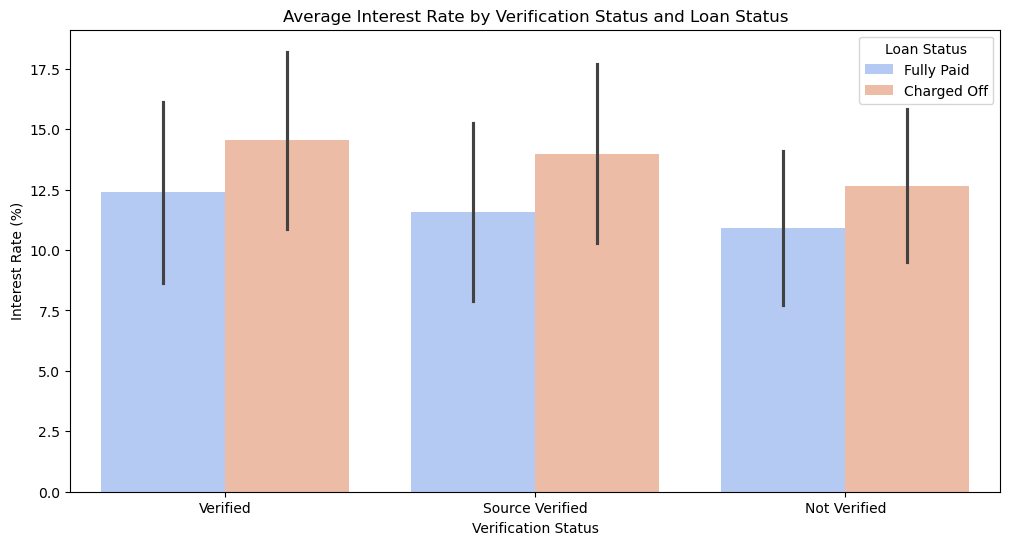

In [419]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=loan_df,
    x='verification_status',
    y='int_rate',
    hue='loan_status',
    ci='sd',
    palette='coolwarm'
)
plt.title('Average Interest Rate by Verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

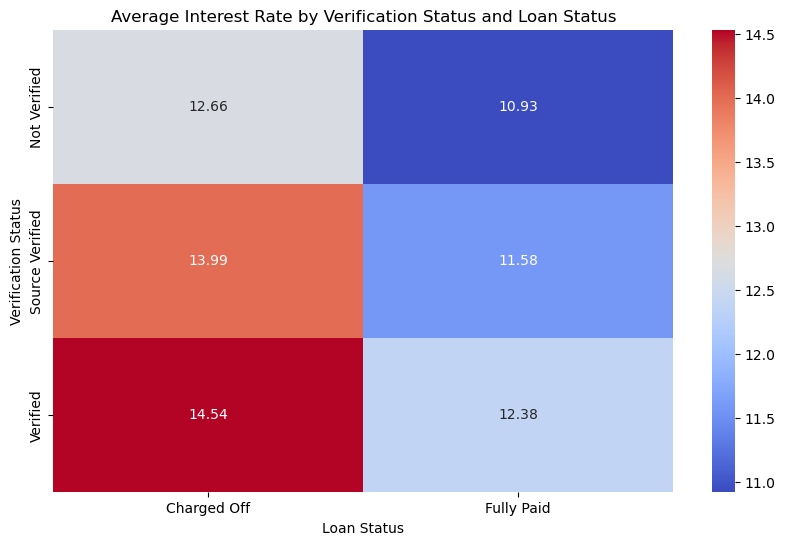

In [421]:
heatmap_data = loan_df.pivot_table(
    index='verification_status',
    columns='loan_status',
    values='int_rate',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Average Interest Rate by Verification Status and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.show()

#### It seems that verification status as 'Verified' are linked with highest interest rates. And as can be seen in heat plot, that the each category of verification status has higher interest rates for Charged Off loans as compared to Fully paid.

## Observations from Data Analysis Part 2 - using loan_status and two more column

#### 1. Confirms that 'Small_Business' have the highest average loan amount and are most risky type of loan.
#### 2. 60 Months term have higher mean loan amount. This confirms our two observations that higher loan amount have higher risk of being Charged Off (as we know by previous analysis that 60 months term have higher percentage of Charged Off loans as compared to 36 months term) and 60 Months term is associated with higher risk of being Charged Off.
#### 3. Higher loan amounts have higher interest rates. And from our previous analysis it was seen that both of these factors are associated with high risk of loan being Charged Off.
#### 4. Mean number of installments increases as the loan amount increases.
#### 5. Grades E,F,G has higher average loan amounts in the Charged Off segment, as we have seen in previous analysis that these three also have highest percentage of Charged Off loans as compared to other grades. Thus this confirms our findings. It also confirms a strong link between higher loan amounts being more risky and prone to being Charged Off.
#### 6. A slight trend can be seen that the average loan amount increases as the emp_length increases. Also, for same emp_length the charged Off loans have higher average loan amount.
#### 7. Home_Ownership value 'OTHER' has the highest average loan amount. And from previous analysis it was shown that the home_ownershipvalue 'OTHER' has the highest percentage of Defaulters (Charged Off loans) among various home_ownership values. Also, it can be seen for each category of home_ownership has higher average loan amount for Charged Off as compared to Fully Paid.
#### 8. From scatter plot, it can be seen that Charged Off loans are mostly concentrated towards the lower income segment (0 to 60k). Also, it can be seen from heatmap that in each income segment the average loan amount is higher for Charged Off than for Fully Paid.
#### 9. From Part 1 analysis it was shown that verification_status 'Verified' has slightly higher percentage of default loans as comparedto other values of verification_status. From heatmap it is seen that the highest values for average loan amounts are for verification_status 'Verified'. Also, for each category of verification_status the Charged Off loans have higher average loan amount than for Fully Paid.
#### 10. From heatmap it can be seen that for each segment of DTI the average loan amount for Charged Off is higher than for Fully Paid. Also, from scatter plot it can be seen that most Charged Off loans are located in DTI range of 15-25. From heatmap it can be seen that higher DTI range has higher average loan amount.
#### 11. Average annual income is higher for 60 months terms as compared to 36 months. Also, for same term the average annual income is higher for Charged Off as compared to Fully paid.
#### 12. It can be seen that as emp_length increases the average annual income increases. Also, it can be seen from heat map that in each emp_length segment the Fully Paid loans have higher average annual income than the Charged Off
#### 13. As the DTI increases the average annual income decreases. For the same category of DTI the Fully Paid loans have higher income than the Charged Off loans.
#### 14. Average Interest rates are low for Fully paid Loans as compared to Charged Off loans.
#### 15. Average interest rate increases as number of installments increases. From previous analysis higher interest rates are linked with higher Charged off loans.
#### 16. It seems that verification status as 'Verified' are linked with highest interest rates. And as can be seen in heat plot, that the each category of verification status has higher interest rates for Charged Off loans as compared to Fully paid.

# Observations from Analysis Part 1 are reported below, for clear 

## Observations from above Analysis Part 1:
#### 1. Among all grades, The highest percentage of defaulters(Charged Off) are in grade G (next highest in F and then in E).
#### 2. 60 Months term shows higher percentage of Charged Off Loans, as compared to 36 months.
#### 3. All emp_length values have almost equal percentage of defaulters though emp_length >=10 years have little 
####    higher percentage of defaulters. So emp_length does not seems to have much impact on risk of a loan being Charged Off. 
#### 4. Among all values of 'purpose', highest percentage of defaulters(Charged Off) are there for loans taken for  'small_business'.
#### 5. Home_Ownership has almost no significant impact. Though Home_ownership = OTHER has slightly higher percentage
####    of defaulters(Charged Off loans) as compared to other values of home_ownership. 
#### 6. Different verification_status values shows almost negligible differences in percentages of defaulters, 
####    though verification_status = 'verified' shows (slightly higher than others) highest percentage of defaulted loans
####    as compared to other values of verification_status. So this will have little impact on the risk calculation of a loan.
#### 7. As the loan amount increases the possibility of default(Charged Off loan) increases. The loan_amnt_category with highest loan
####    seems to have highest percentage of loan default(Charged Off). 18k-24k, 24k-30k are two ranges of loan_amnt with highest possibility
####    of a loan being Charged Off as compared to other lower ranges of loan_amnt.
#### 8. Among various interest Rate values, the highest percentage of loan defaults(Charged Off) are for loans where interest rate is 
####    high around 17%-24%. 
#### 9. Installments do not have much impact on the risk of a loan being charged off, though installments ranging from 370-975 have slightly 
####    higher possibility of being charged off as compared to other installment categories.
#### 10.Among all the dti values, the higher percentage of defaults(charged off) can be seen for dti ranging between 18-30.  
####    It can be seen that in general when dti increases the risk of loan being Charged Off increases. 
#### 11.The people with low annual income have more default rate. The highest percentage of defulters can be seen in annual income range     from 0 to 28K and second highest default rate is in annual income range from 28k to 56k.
#### 12.All sub grades show equal percentages of Charged Off and Fully Paid loans. Sub grades individually does 
#### not have much impact on possibility of default

# Recommendations----
1. Loans with higher loan amounts are more prone to default (Charged Off), so all such loans should be scrutinized more than other loans.
   Verification process for such loans should be made more stringent.
   And if possible break that loan into multiple parts which would be passed after retreiving principal of previous part.
   Or it should be passed with higher collateral. 
2. All of the following are indicators of possible higher loan amounts - 60 months term, Grades G(E & F), 'Small_Business' as Purpose, Home_Ownership = 'OTHER'. 
3. Verification process should be improved because for verified loans the average loan amounts is high, the average interest rates are high and are more prone to being Charged  Off as compared to other types of verification_status.
4. Higher interest rates are more prone to being Charged off, So increasing interest rates should be done only when it is absolutely necessary for business and that loan should be very thoroughly verified.
5. Interest rates increases as the number of installments increases, so loans with higher number installments should be more scruitinized before allowing them and customer should be tried to be convinced to avail a loan with low number of installments to avail low interest rates.

